<a href="https://colab.research.google.com/github/ebonhart99/Finding-Fraud-Project/blob/main/Eric_Mayo_Fighting_Fraud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loading Libraries

In [1]:
from IPython.core.display import display, HTML
from IPython.display import clear_output
display(HTML("<style>.container { width:90% }</style>"))
import warnings
warnings.filterwarnings('ignore')
# ------------------------------------------------------------------

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# -- sklearn modules
from sklearn.model_selection import train_test_split    #- partition train/test split
from sklearn.ensemble import RandomForestClassifier     #- random forest classifier
from sklearn.ensemble import GradientBoostingClassifier #- GBM classfier
from sklearn.neural_network import MLPClassifier        #- multi-layer perceptron

# -- we need these to make our pipelines
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.inspection import permutation_importance
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import roc_curve, auc

# -- we need these to evaluate our models
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

# -- need this to render charts in notebook --
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
# --
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# --
from collections import Counter
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import roc_auc_score
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, roc_auc_score
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler
import zipfile
from sklearn.metrics import precision_recall_curve, average_precision_score

# Load Dataset

In [2]:
import pandas as pd

# Unzip the file
with zipfile.ZipFile('/content/project_2_training.csv.zip', 'r') as zip_ref:
    zip_ref.extractall('')

# Load the dataset
df = pd.read_csv('project_2_training.csv')

# Display the first few rows of the dataframe
df.head()

,EVENT_ID,account_age_days,transaction_amt,transaction_adj_amt,historic_velocity,ip_address,user_agent,email_domain,phone_number,billing_city,...,transaction_env,EVENT_TIMESTAMP,applicant_name,billing_address,merchant_id,locale,tranaction_initiate,days_since_last_logon,inital_amount,EVENT_LABEL
0,2608000,5774.0,2172.0,78.0,4523.0,81.237.240.91,Mozilla/5.0 (iPod; U; CPU iPhone OS 3_0 like M...,graves.org,456-910-9478,South Angelaville,...,R,2021-02-21 16:32:23,Kristi Bell,7683 Chavez Curve,882-35-3409,es_VE,Q,82.0,4609.0,legit
1,214500,5405.0,2887.0,51.0,4057.0,160.32.216.178,Mozilla/5.0 (Macintosh; PPC Mac OS X 10 10_7) ...,howard-madden.com,269.363.8079,Lake Leslietown,...,O,2020-12-30 11:36:17,Amanda Bond,628 Cline Streets,453-93-1357,bhb_IN,S,2.0,12384.0,legit
2,294600,6570.0,2887.0,56.0,5602.0,109.156.235.28,Mozilla/5.0 (Windows NT 6.2) AppleWebKit/535.2...,walsh-goodwin.com,366.185.9975,Lake Kendra,...,C,2021-03-24 05:34:28,Joanna Walton,268 Ashley Plaza Apt. 416,554-51-8940,mi_NZ,W,43.0,9607.0,legit
3,477060,3865.0,1591.0,58.0,3926.0,158.152.249.45,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,gonzalez-diaz.com,816-365-8213,East Maryport,...,G,2021-10-12 16:24:49,Matthew Johnson,8377 Jacob Course,492-66-7677,yue_HK,Y,71.0,10305.0,legit
4,1993100,6625.0,3297.0,70.0,6675.0,167.164.91.31,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,bender-rocha.info,001-970-935-1735x19620,Yorkburgh,...,W,2021-06-23 00:05:15,Susan Phillips,401 Christopher Meadows,468-86-6030,gd_GB,Q,52.0,4139.0,legit


# Exploratory Analysis

While there are some nulls, the pipeline with impute the mean for the missing values, so I'll skip manually dropping/filling in these null values.

In [ ]:
df.isnull().sum()

EVENT_ID                   0
account_age_days           0
transaction_amt            0
transaction_adj_amt        0
historic_velocity          0
ip_address               104
user_agent                95
email_domain              76
phone_number             102
billing_city              94
billing_postal            98
billing_state             94
card_bin                 110
currency                  94
cvv                      102
signature_image           92
transaction_type          98
transaction_env          104
EVENT_TIMESTAMP           90
applicant_name           124
billing_address          111
merchant_id               89
locale                   115
tranaction_initiate      100
days_since_last_logon    113
inital_amount            109
EVENT_LABEL                0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125000 entries, 0 to 124999
Data columns (total 27 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   EVENT_ID               125000 non-null  int64  
 1   account_age_days       125000 non-null  float64
 2   transaction_amt        125000 non-null  float64
 3   transaction_adj_amt    125000 non-null  float64
 4   historic_velocity      125000 non-null  float64
 5   ip_address             124896 non-null  object 
 6   user_agent             124905 non-null  object 
 7   email_domain           124924 non-null  object 
 8   phone_number           124898 non-null  object 
 9   billing_city           124906 non-null  object 
 10  billing_postal         124902 non-null  float64
 11  billing_state          124906 non-null  object 
 12  card_bin               124890 non-null  float64
 13  currency               124906 non-null  object 
 14  cvv                    124898 non-nu

Just separating numeric from categorical.

In [3]:
# Get the list of numeric columns
numeric_columns = df.select_dtypes(include=[np.number]).columns
numeric_columns

Index(['EVENT_ID', 'account_age_days', 'transaction_amt',
       'transaction_adj_amt', 'historic_velocity', 'billing_postal',
       'card_bin', 'days_since_last_logon', 'inital_amount'],
      dtype='object')

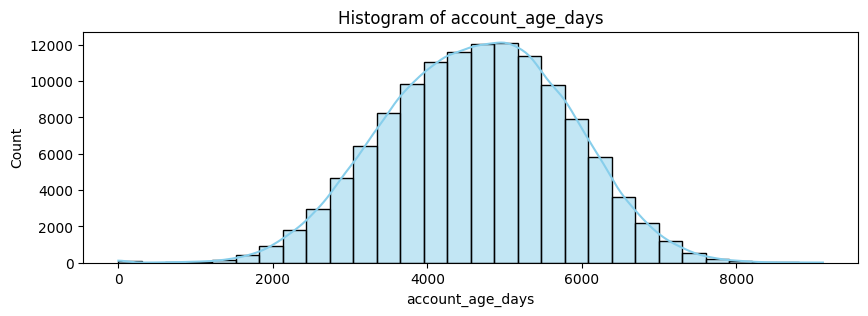

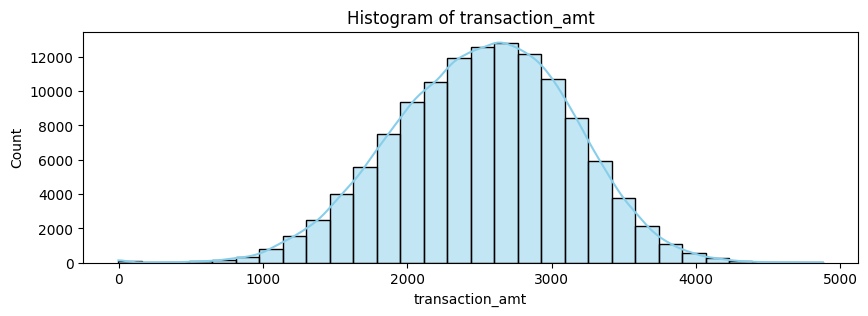

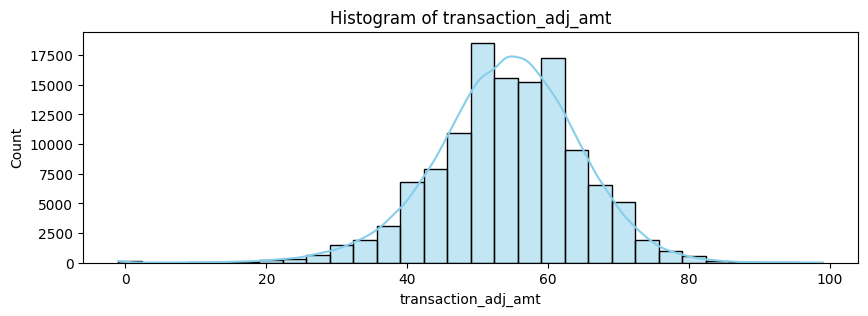

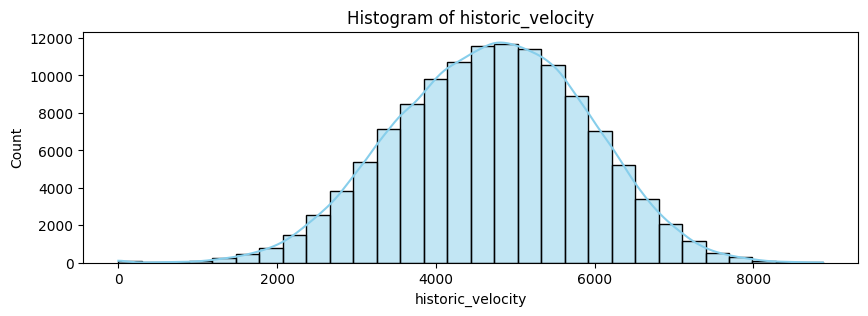

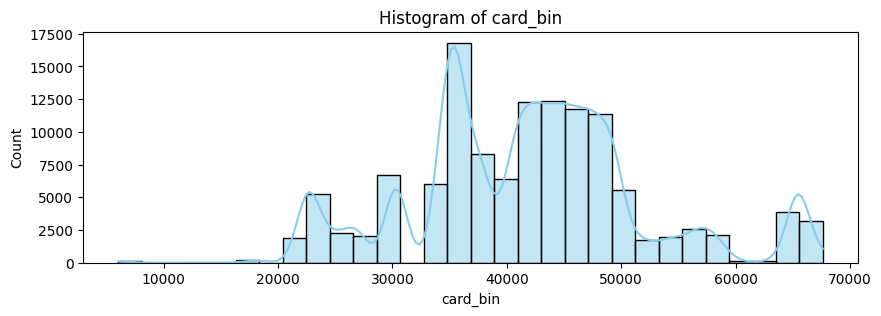

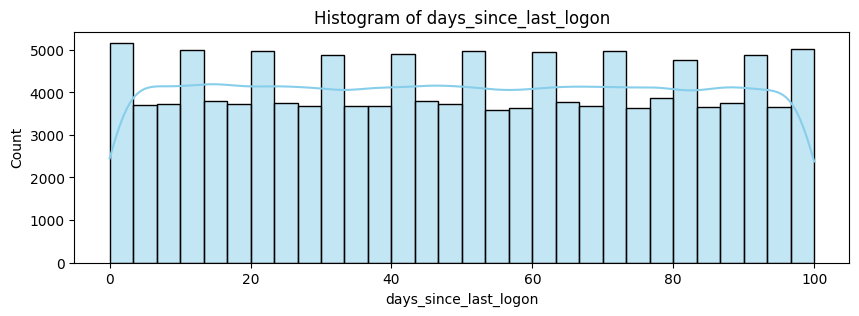

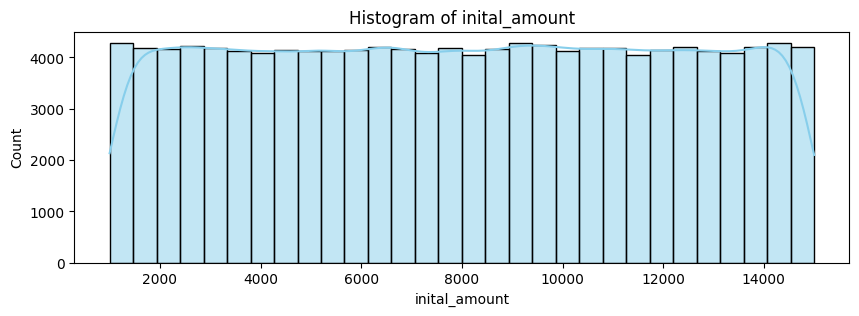

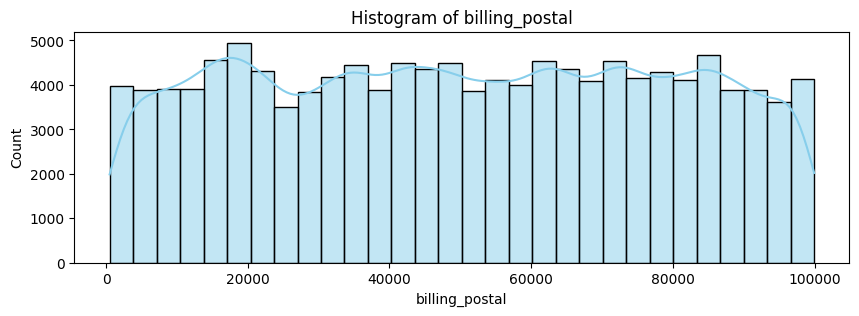

In [4]:
numeric_features = ['account_age_days', 'transaction_amt', 'transaction_adj_amt',
       'historic_velocity', 'card_bin', 'days_since_last_logon', 'inital_amount',
        'billing_postal']

for feature in numeric_features:

  # Set the figure size
  plt.figure(figsize=(10, 3))
  # Create the histogram using seaborn
  sns.histplot(df,x=feature, bins=30, kde=True, color='skyblue')
  # Set the title and x-label
  plt.title(f'Histogram of {feature}')
  plt.xlabel(feature)
  # Display the plot
  plt.show()

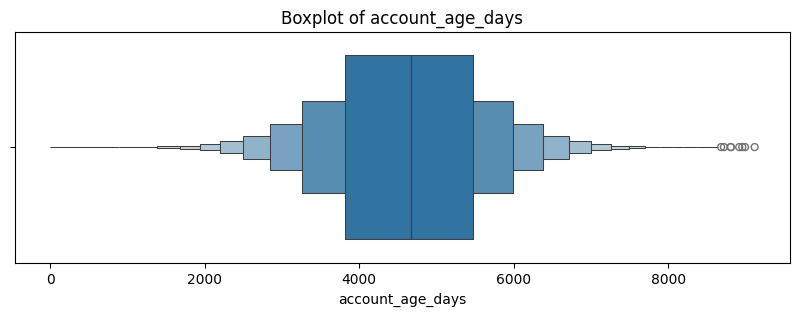

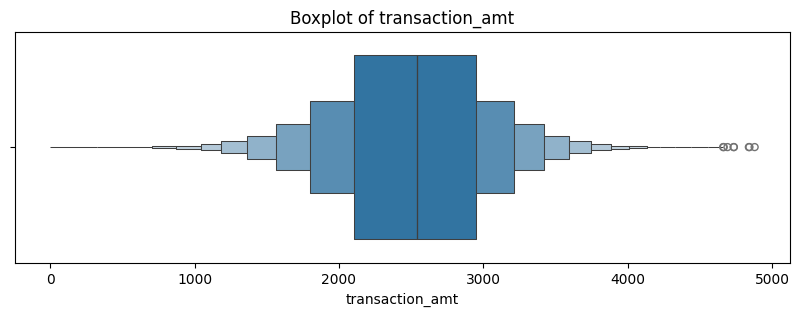

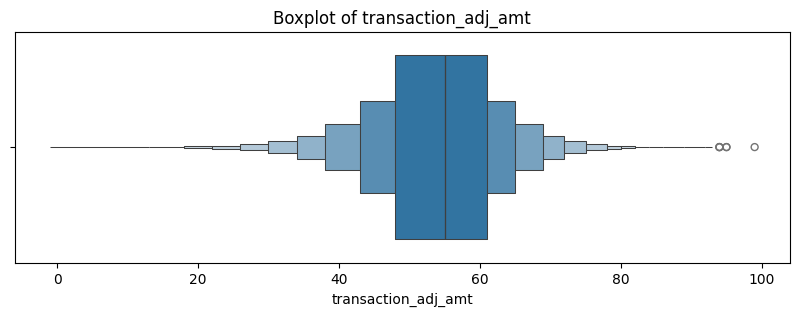

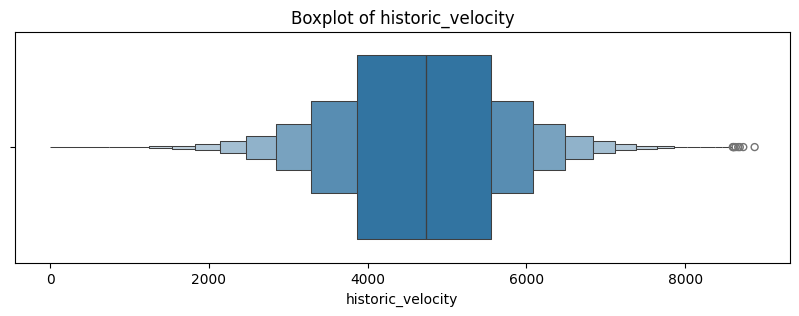

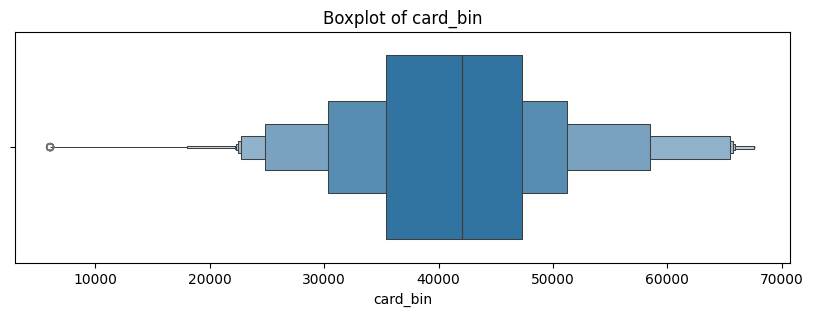

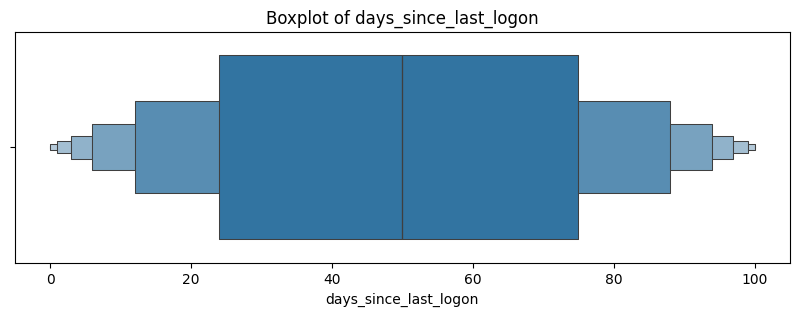

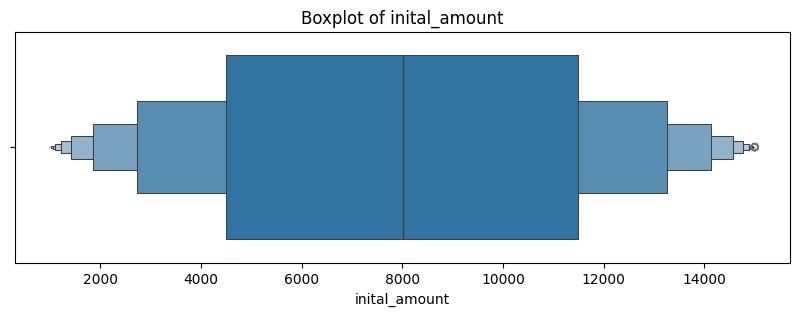

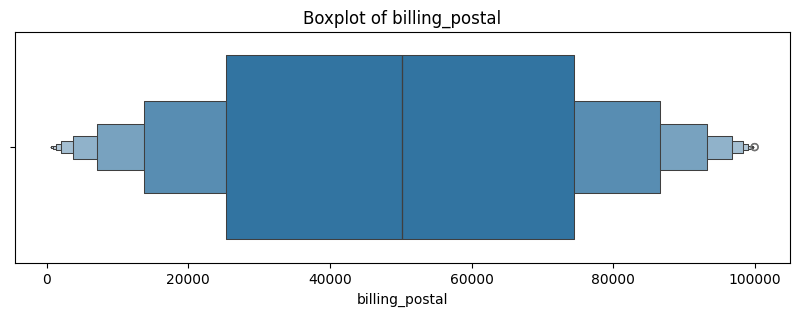

In [5]:
for feature in numeric_features:
  # Set the figure size
  plt.figure(figsize=(10, 3))
  # Create the histogram using seaborn
  sns.boxenplot(df,x=feature)
  # Set the title and x-label
  plt.title(f'Boxplot of {feature}')
  plt.xlabel(feature)
  # Display the plot
  plt.show()

In [6]:
df[numeric_features].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
account_age_days,125000.0,4642.453544,1160.915198,-1.0,3822.0,4668.0,5472.00,9119.0
transaction_amt,125000.0,2519.545384,609.301502,-1.0,2102.0,2543.0,2952.00,4880.0
transaction_adj_amt,125000.0,54.142104,10.173766,-1.0,48.0,55.0,61.00,99.0
historic_velocity,125000.0,4699.900328,1194.355466,-1.0,3871.0,4731.0,5549.00,8875.0
card_bin,124890.0,41813.290488,10084.073653,6040.0,35378.0,42061.0,47330.75,67639.0
days_since_last_logon,124887.0,49.814320,29.224983,0.0,24.0,50.0,75.00,100.0
inital_amount,124891.0,7999.642744,4050.179291,1000.0,4486.0,8007.0,11498.00,15000.0
billing_postal,124902.0,50210.791060,28405.879291,503.0,25298.0,50124.0,74457.00,99950.0


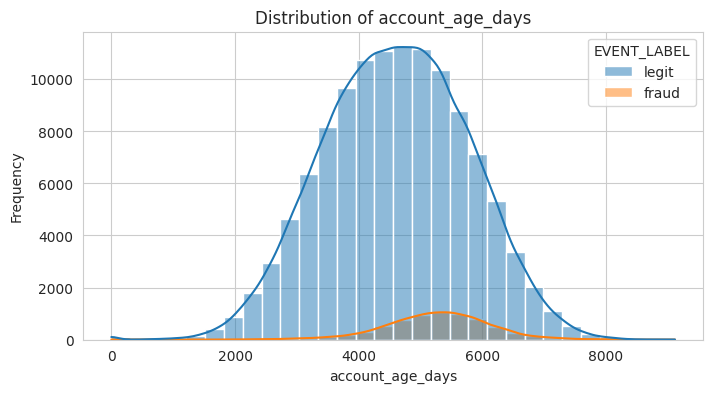

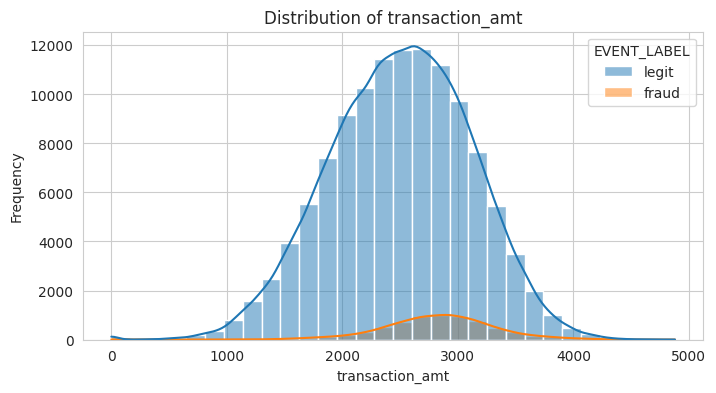

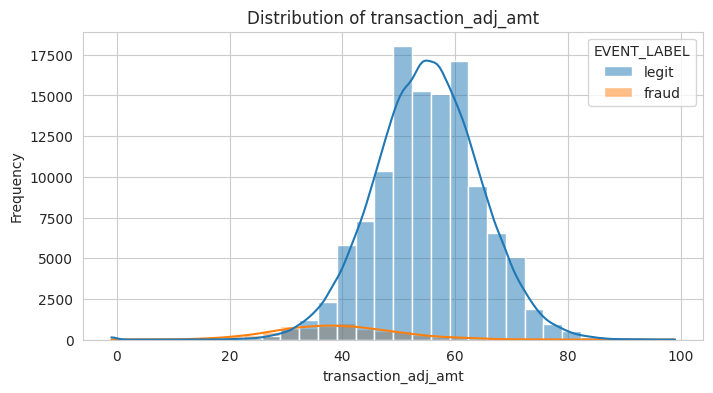

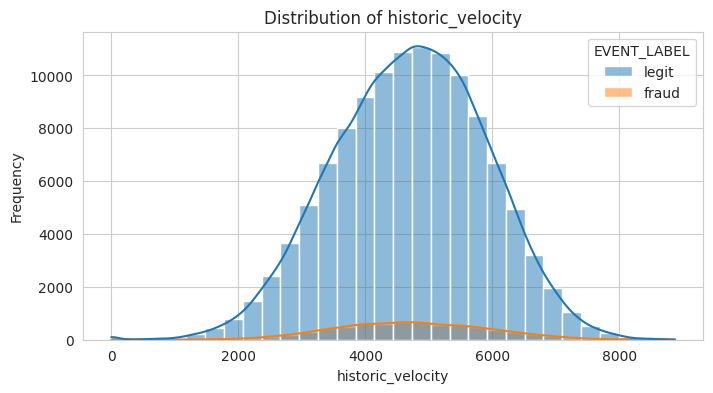

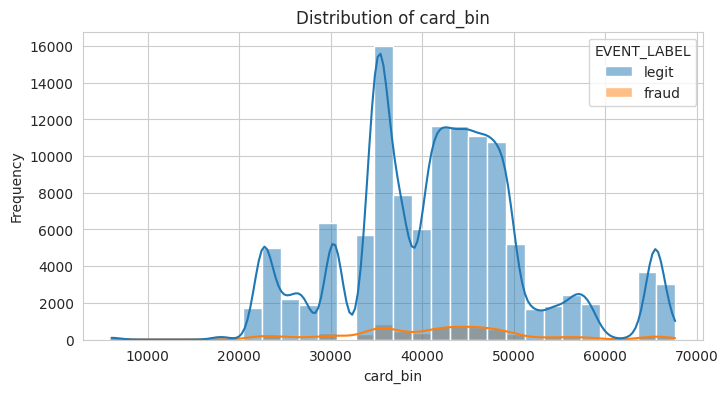

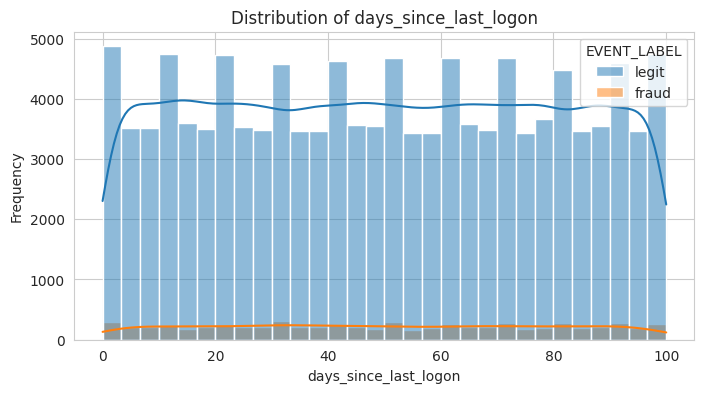

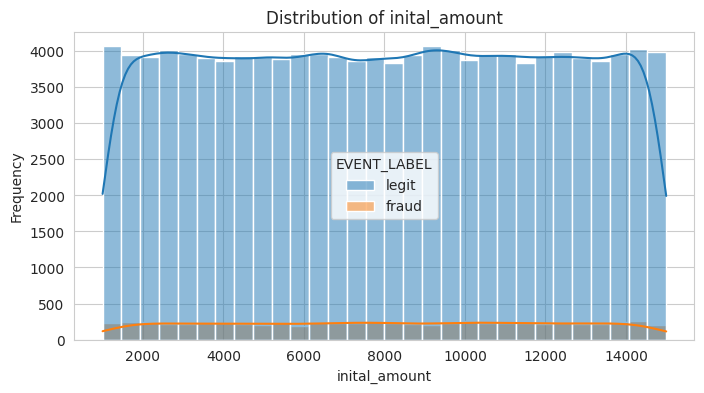

In [12]:
# Setting the aesthetic style of the plots
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(data= df, x=col, hue="EVENT_LABEL", kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

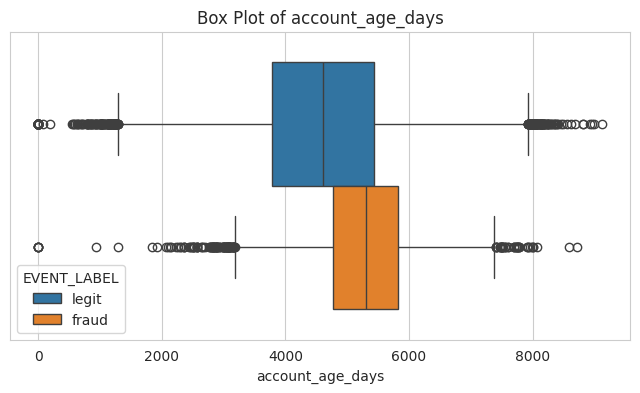

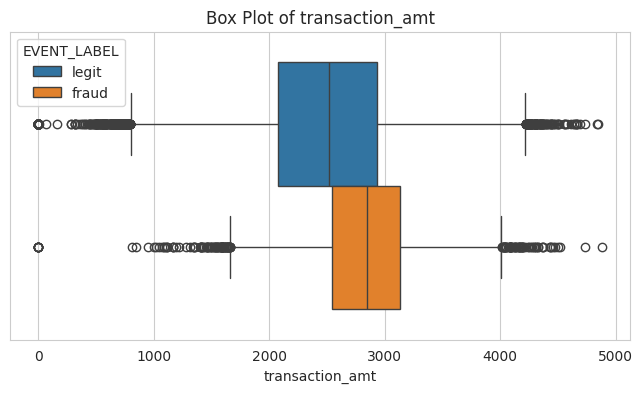

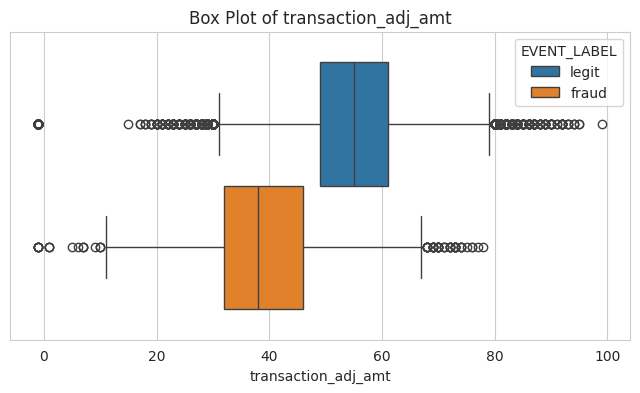

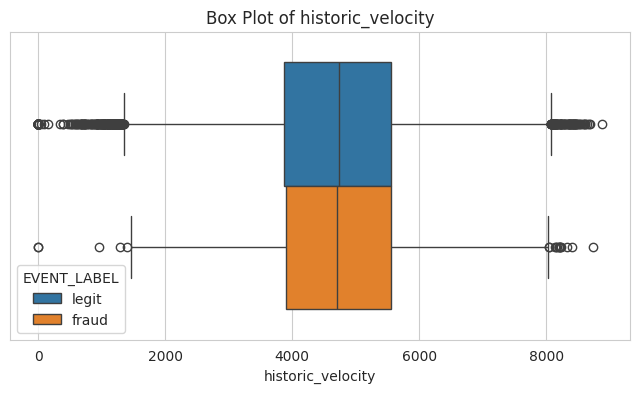

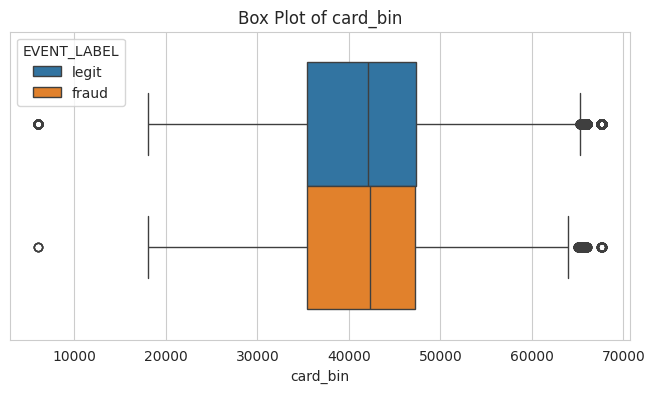

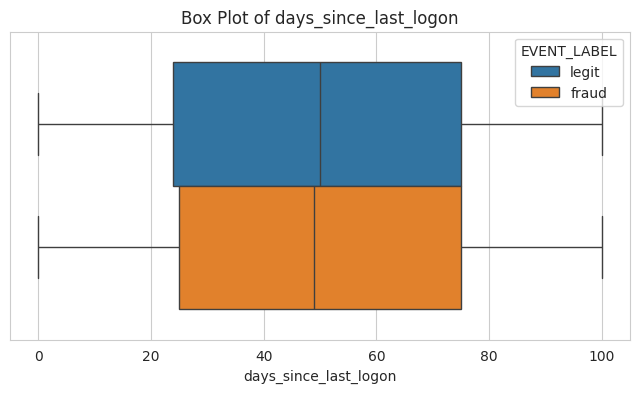

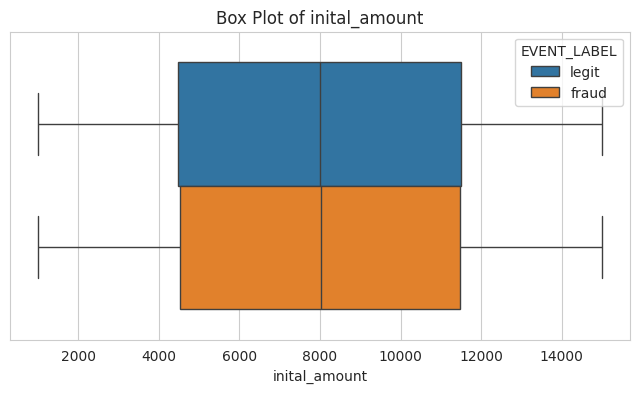

In [13]:
for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data= df, x=col, hue="EVENT_LABEL")
    plt.title(f'Box Plot of {col}')
    plt.xlabel(col)
    plt.show()

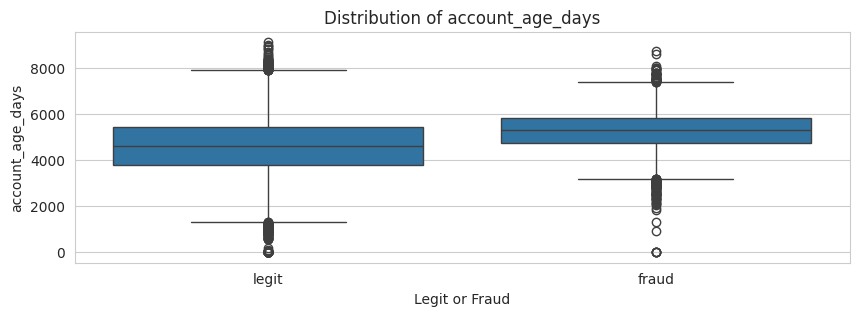

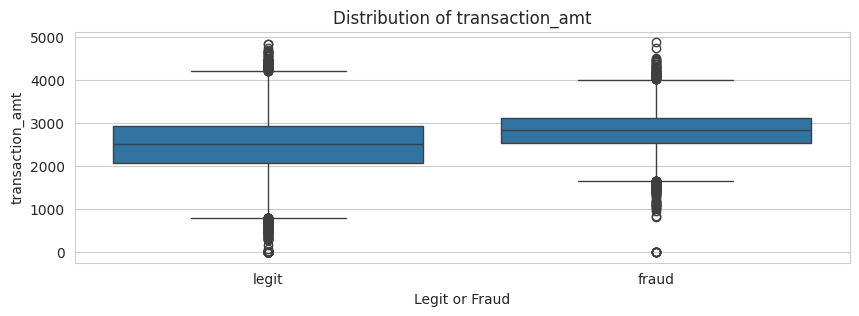

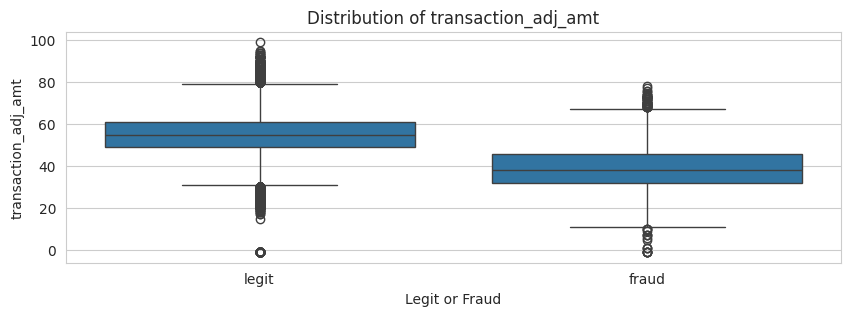

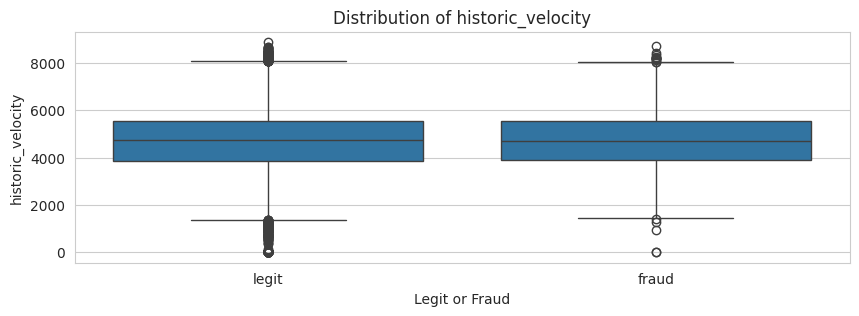

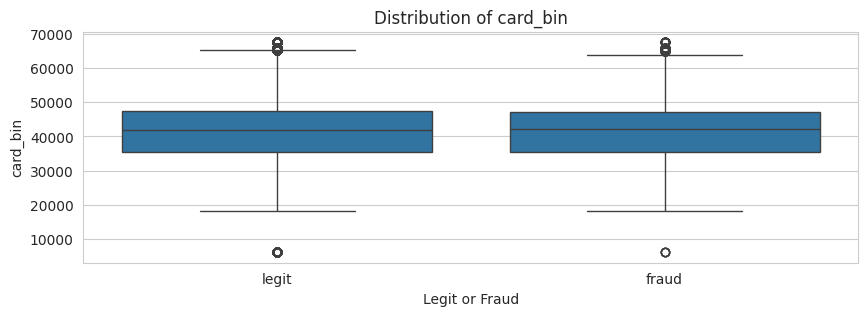

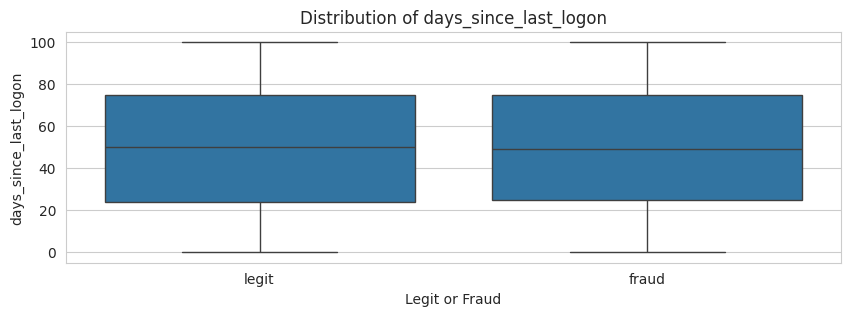

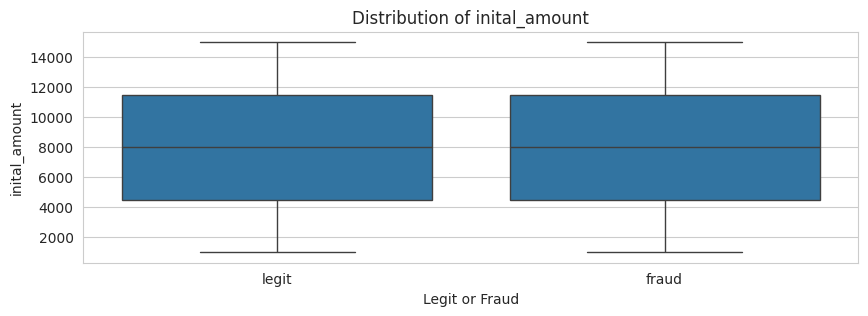

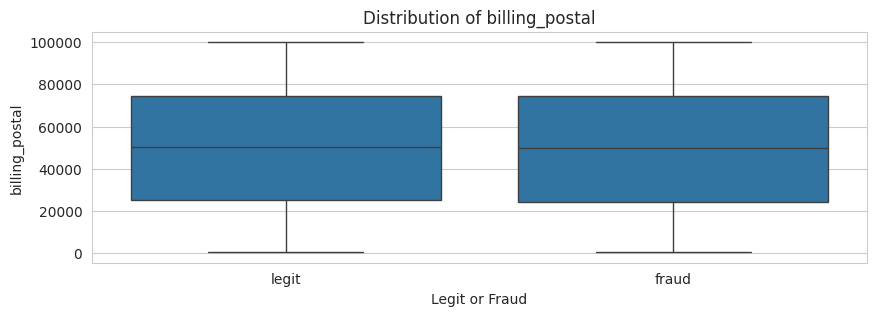

In [14]:
for num_col in numeric_features:
  plt.figure(figsize=(10, 3))
  sns.boxplot(x='EVENT_LABEL', y=num_col, data=df)
  plt.title(f'Distribution of {num_col}')
  plt.xlabel('Legit or Fraud')
  plt.ylabel(num_col)
  #plt.show()

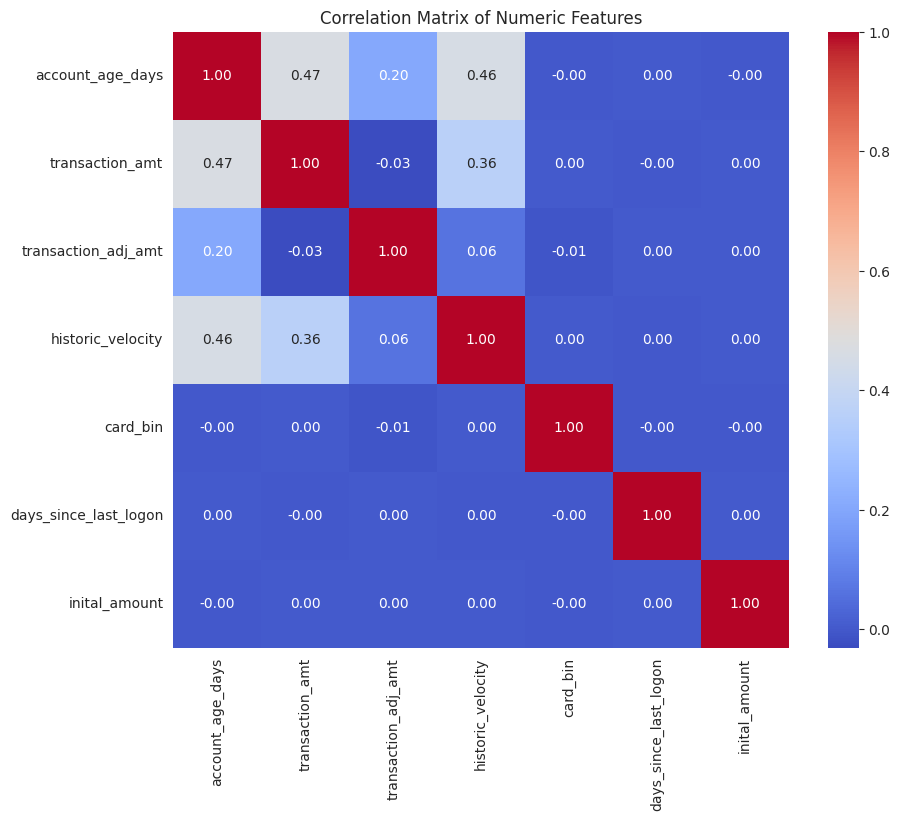

In [15]:
# Compute the correlation matrix
corr = df[numerical_cols].corr()

# Generate a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)
plt.title('Correlation Matrix of Numeric Features')
plt.show()

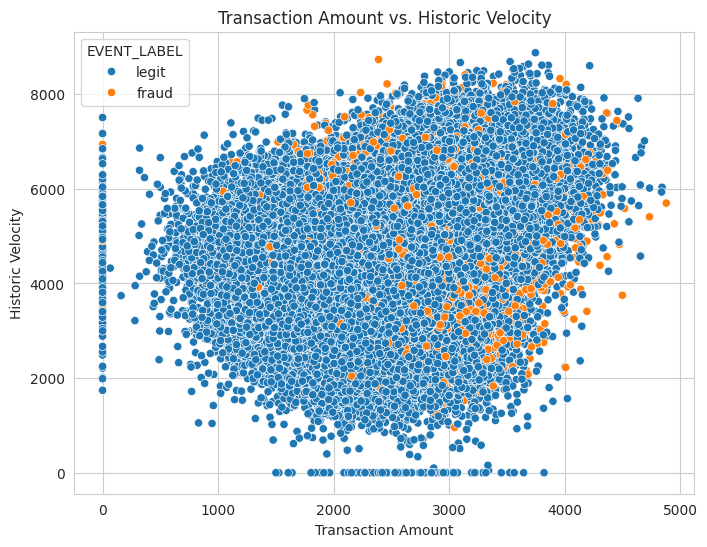

In [16]:
# Example scatter plot between 'transaction_amt' and 'historic_velocity'
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='transaction_amt', y='historic_velocity', hue='EVENT_LABEL')
plt.title('Transaction Amount vs. Historic Velocity')
plt.xlabel('Transaction Amount')
plt.ylabel('Historic Velocity')
plt.show()

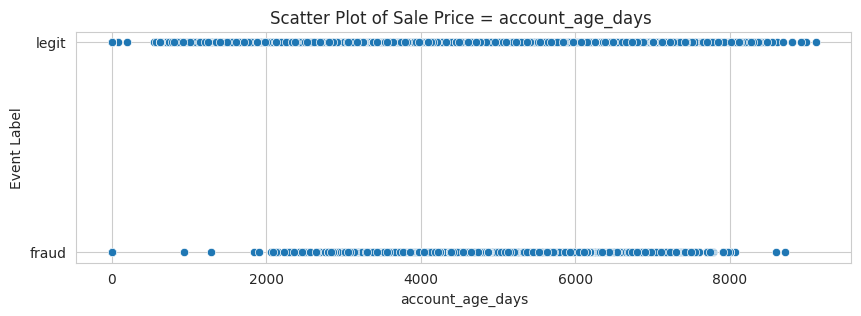

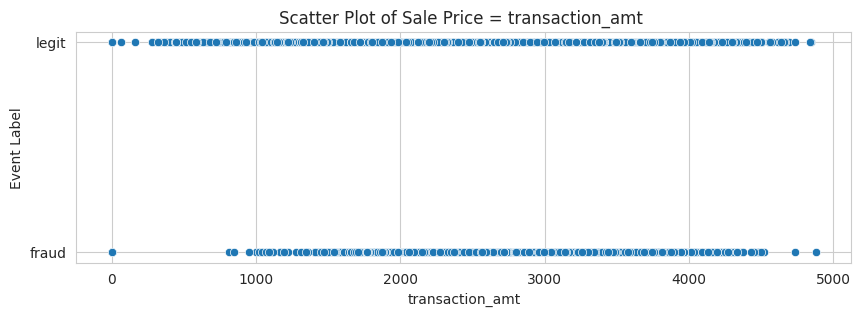

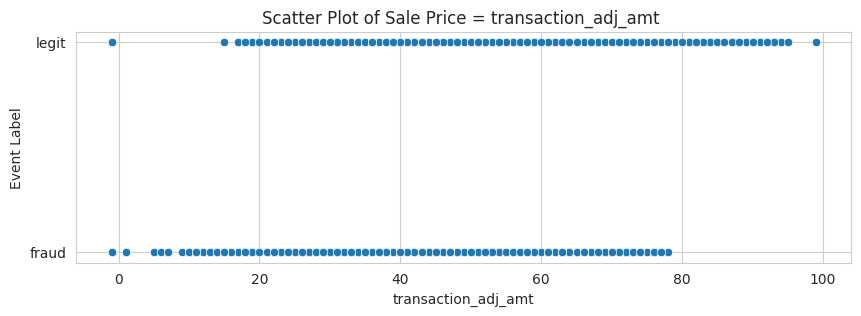

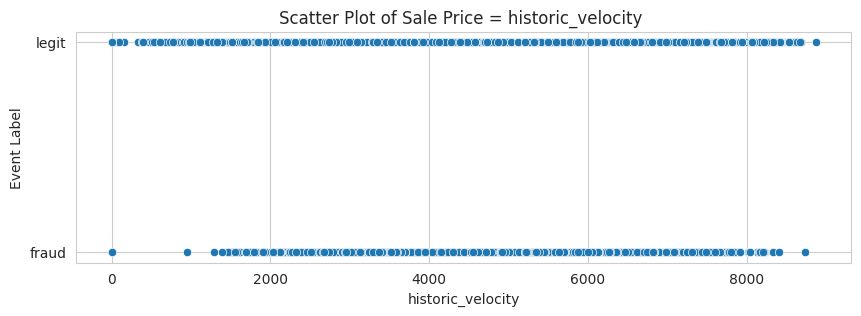

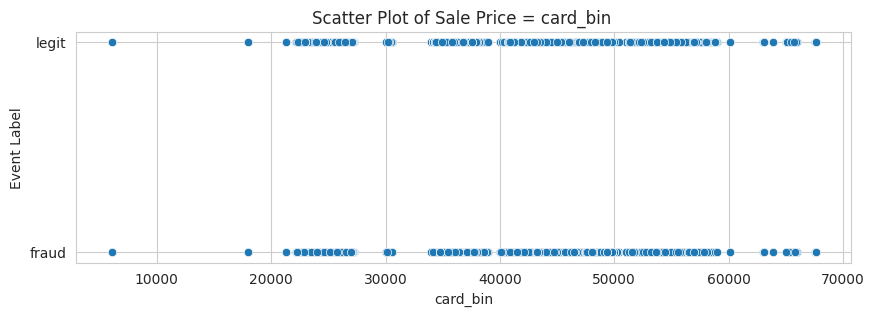

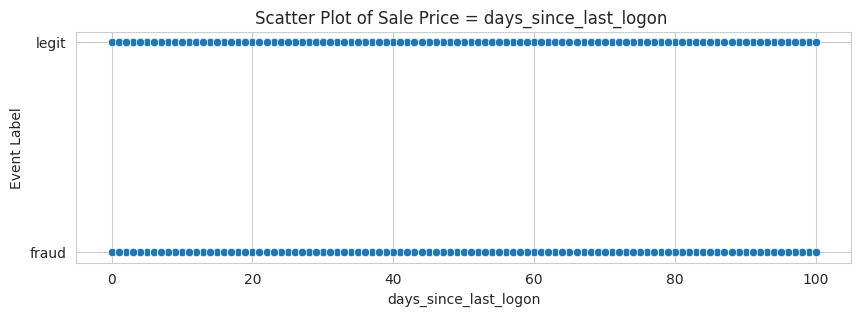

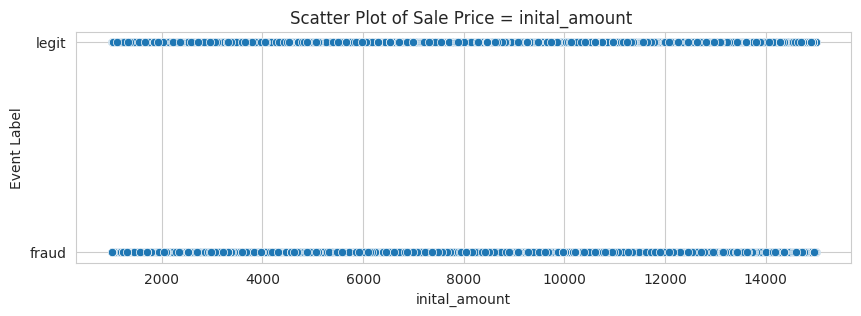

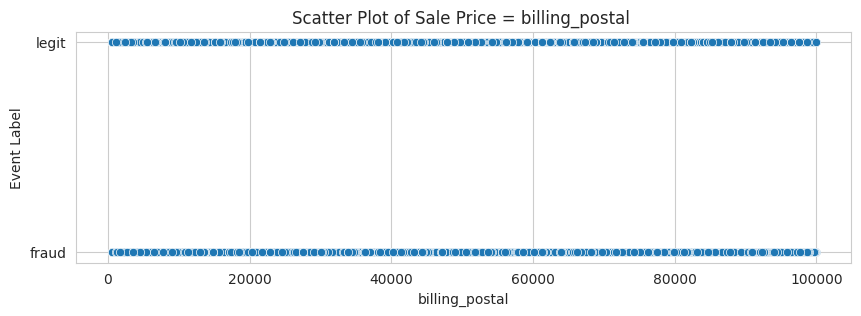

In [17]:
for feature in numeric_features:
  if feature != 'EVENT_LABEL':
    # Set the figure size
    plt.figure(figsize=(10, 3))
    # Create the histogram using seaborn
    sns.scatterplot(df,x=feature, y='EVENT_LABEL')
    # if you want a linear line
    # sns.regplot(df,x=feature, y='EVENT_LABEL', scatter_kws={'s': 50, 'color': 'blue'}, line_kws={'color': 'red'})

    # Set the title and x-label
    plt.title(f'Scatter Plot of Sale Price = {feature} ')
    plt.xlabel(feature)
    plt.ylabel('Event Label')
    # Display the plot
    plt.show()

In [ ]:
# Get the list of numeric columns
categorical_columns = df.select_dtypes(include=['object']).columns
categorical_columns

Index(['ip_address', 'user_agent', 'email_domain', 'phone_number',
       'billing_city', 'billing_state', 'currency', 'cvv', 'signature_image',
       'transaction_type', 'transaction_env', 'EVENT_TIMESTAMP',
       'applicant_name', 'billing_address', 'merchant_id', 'locale',
       'tranaction_initiate', 'EVENT_LABEL'],
      dtype='object')

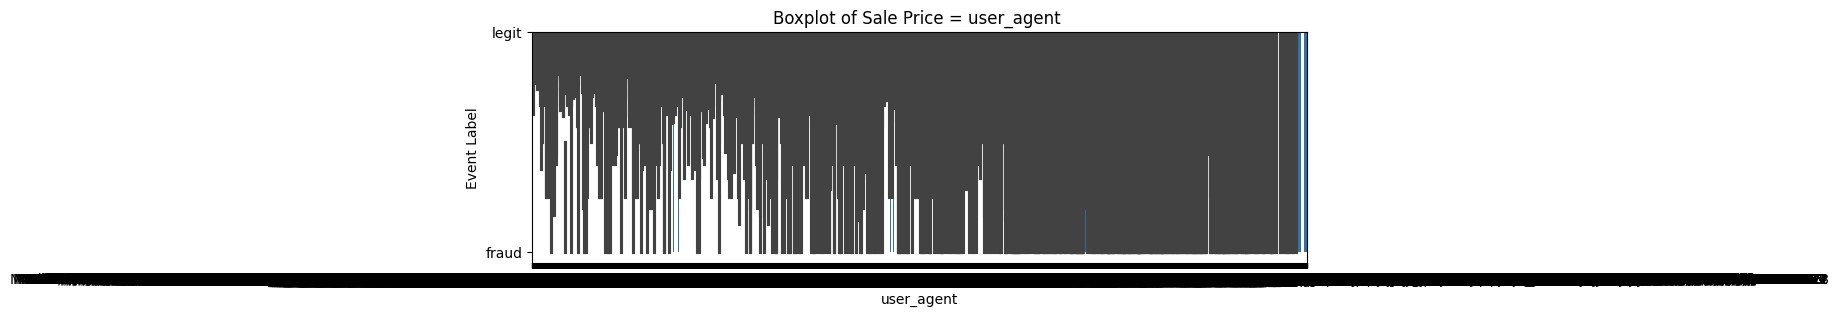

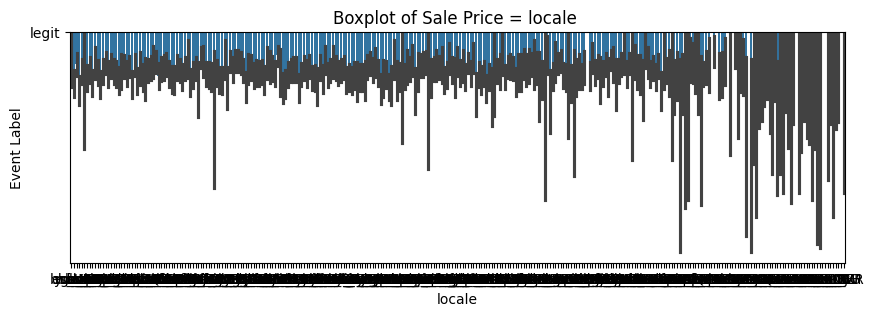

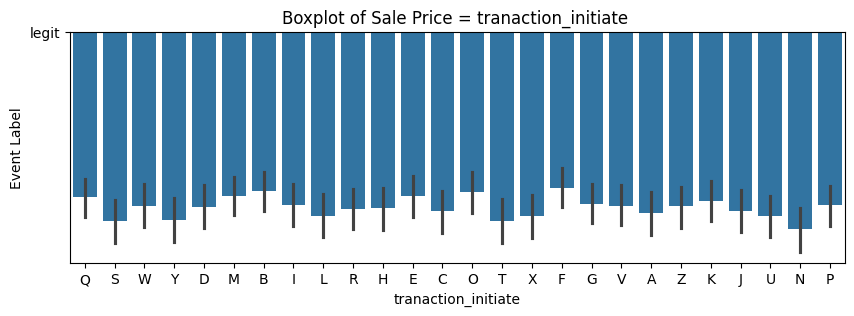

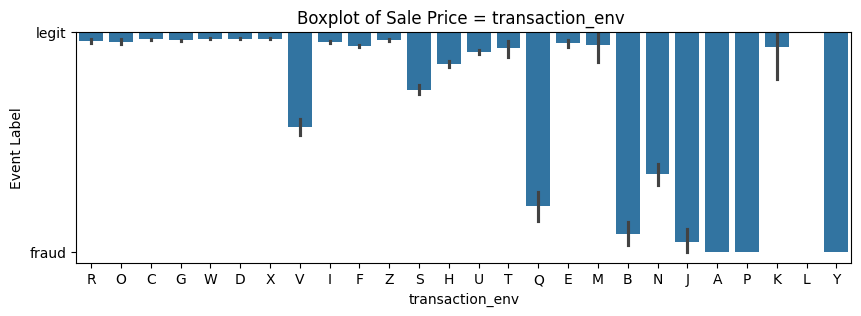

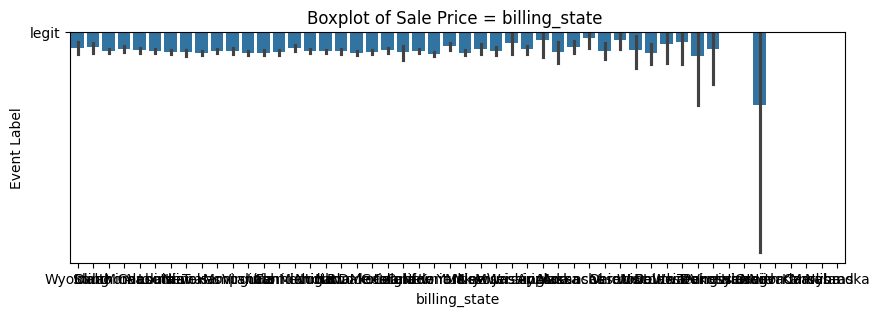

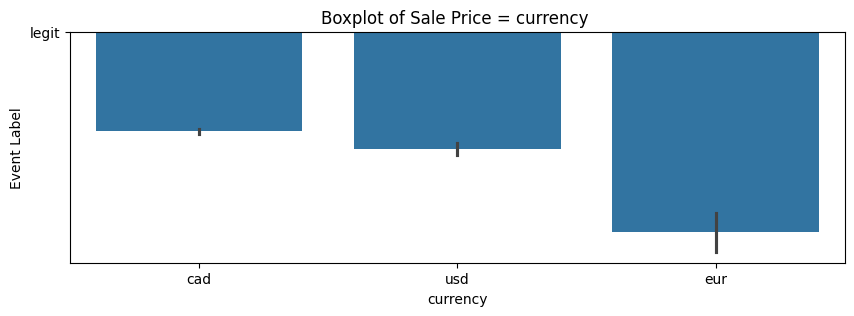

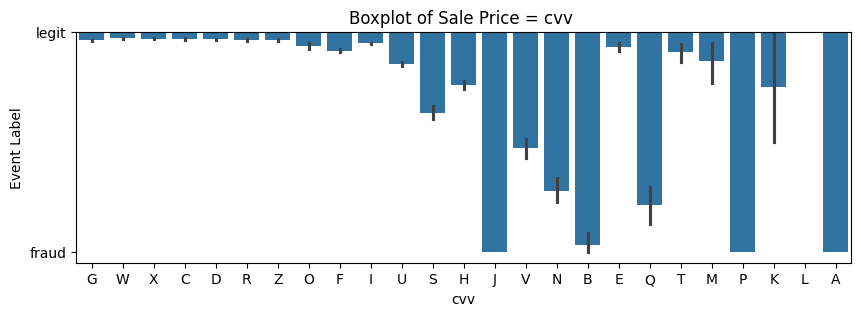

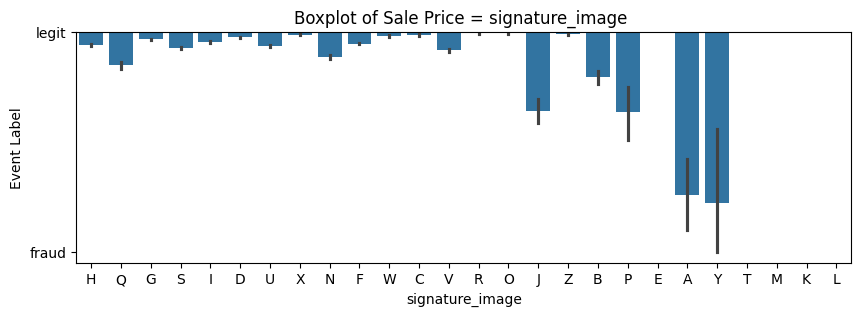

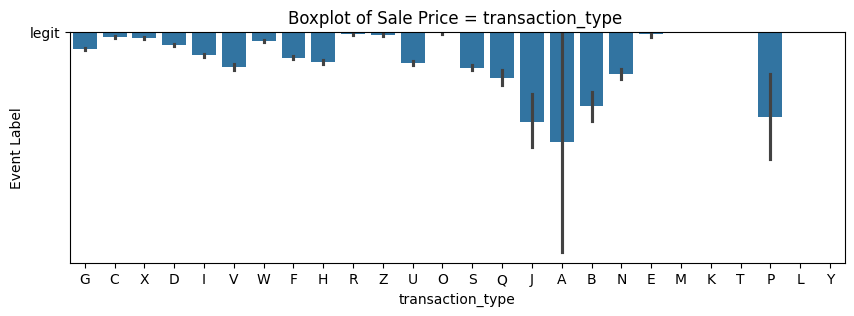

In [ ]:
for category in categorical_features:
  # Set the figure size
  plt.figure(figsize=(10, 3))
  # Create the histogram using seaborn
  sns.barplot(df,x=category, y='EVENT_LABEL')
  plt.title(f'Boxplot of Sale Price = {category} ')
  plt.xlabel(category)
  plt.ylabel('Event Label')
  # Display the plot
  plt.show()

## Spread of EVENT_LABEL

In [ ]:
df['EVENT_LABEL'].unique()

array(['legit', 'fraud'], dtype=object)

Verrrrrrrry little fraud in the dataset.

Text(0.5, 1.0, 'Distribution of Legit & Fraud')

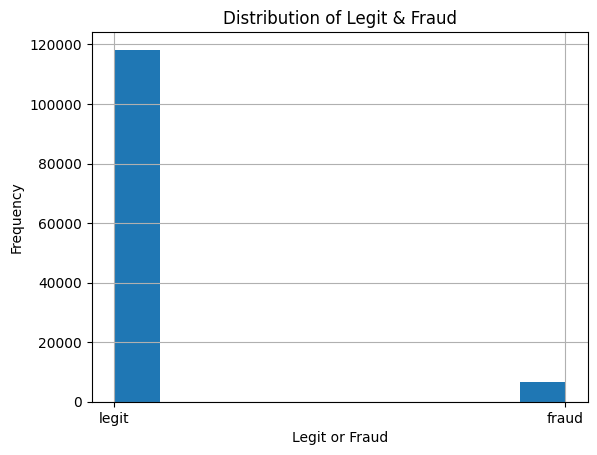

In [ ]:
df['EVENT_LABEL'].hist()

plt.xlabel('Legit or Fraud')
plt.ylabel('Frequency')
plt.title('Distribution of Legit & Fraud')

# Preprocessing Data

Pipelines are great, as we learned in class. Makes things a lot easier than having to preprocess by hand.

In [55]:
# Identify categorical and numerical columns
categorical_cols = ['locale','tranaction_initiate','transaction_env','billing_state','currency','cvv','signature_image','transaction_type']
numerical_cols = ['account_age_days', 'transaction_amt', 'transaction_adj_amt','historic_velocity', 'card_bin', 'days_since_last_logon', 'inital_amount']
feature_names = categorical_cols + numerical_cols
# Preprocessing for numerical data
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())])

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)])

# Define the target variable
y = df['EVENT_LABEL'].map({'legit': 0, 'fraud': 1})  # Convert to binary
X = df.drop('EVENT_LABEL', axis=1)

# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X[feature_names], y, test_size=0.3, random_state=0)

#Baseline Models

Also gonna create my baseline models through a pipeline.

## Logistic Regression

In [18]:
# Define the Logistic Regression pipeline
lr_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('classifier', LogisticRegression(random_state=0, max_iter=300))])

# Train the Logistic Regression model
lr_pipeline.fit(X_train, y_train)

# Predict and evaluate the model
lr_predictions = lr_pipeline.predict(X_test)
print(f"Logistic Regression Accuracy: {accuracy_score(y_test, lr_predictions):.4f}")

Logistic Regression Accuracy: 0.9747


Not bad recall

In [19]:
# Predictions
y_pred_lr = lr_pipeline.predict(X_test)
y_pred_proba_lr = lr_pipeline.predict_proba(X_test)[:, 1]

# Evaluation Metrics
accuracy_lr = accuracy_score(y_test, y_pred_lr)
auc_lr = roc_auc_score(y_test, y_pred_proba_lr)
precision_lr = precision_score(y_test, y_pred_lr)
recall_lr = recall_score(y_test, y_pred_lr)

# Print the metrics
print("Logistic Regression Model Evaluation:")
print(f"  Accuracy: {accuracy_lr:.4f}")
print(f"  AUC: {auc_lr:.4f}")
print(f"  Precision: {precision_lr:.4f}")
print(f"  Recall: {recall_lr:.4f}")

Logistic Regression Model Evaluation:
  Accuracy: 0.9747
  AUC: 0.9425
  Precision: 0.8809
  Recall: 0.6248


In [20]:
# prompt: extract feature names and position from pipeline to do logisic feature importance

feature_names = preprocessor.get_feature_names_out()
feature_importance = lr_pipeline.named_steps['classifier'].coef_
feature_importance_df = pd.DataFrame({'feature': feature_names, 'importance': feature_importance[0]})
feature_importance_df.sort_values(by='importance', ascending=False).reset_index(drop=True)

,feature,importance
0,cat__transaction_env_B,2.957501
1,cat__transaction_env_P,2.628027
2,cat__transaction_env_J,2.609338
3,cat__transaction_type_B,2.480113
4,cat__transaction_env_Q,2.456709
...,...,...
476,cat__transaction_type_T,-1.791484
477,cat__transaction_type_Z,-1.987488
478,cat__transaction_type_E,-2.080106
479,cat__transaction_type_R,-2.563024


In [21]:
# Logistic Regression coefficients as feature importance
lr_coefficients = lr_pipeline.named_steps['classifier'].coef_[0]

# Aligning feature names and coefficients
lr_feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': lr_coefficients})
lr_feature_importance_df = lr_feature_importance_df.sort_values(by='Coefficient', ascending=False)
lr_feature_importance_df.head(10)

,Feature,Coefficient
327,cat__transaction_env_B,2.957501
341,cat__transaction_env_P,2.628027
335,cat__transaction_env_J,2.609338
456,cat__transaction_type_B,2.480113
342,cat__transaction_env_Q,2.456709
464,cat__transaction_type_J,2.372218
418,cat__cvv_N,2.358432
406,cat__cvv_B,2.338290
471,cat__transaction_type_Q,2.079584
421,cat__cvv_Q,1.974170


## Random Forest

In [22]:
# Define the Random Forest pipeline
rf_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('classifier', RandomForestClassifier(n_estimators=50, n_jobs = -1, random_state=0))])

# Train the Random Forest model
rf_pipeline.fit(X_train, y_train)

# Predict and evaluate the model
rf_predictions = rf_pipeline.predict(X_test)
rf_predictions_proba = rf_pipeline.predict_proba(X_test)[:,1]
print(f"Random Forest Accuracy: {accuracy_score(y_test, rf_predictions):.4f}")

Random Forest Accuracy: 0.9718


In [23]:
# Predictions
y_pred_rf = rf_pipeline.predict(X_test)
y_pred_proba_rf = rf_pipeline.predict_proba(X_test)[:, 1]

# Evaluation Metrics
accuracy_rf = accuracy_score(y_test, y_pred_rf)
auc_rf = roc_auc_score(y_test, y_pred_proba_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)

# Print the metrics
print("Random Forest Model Evaluation:")
print(f"  Accuracy: {accuracy_rf:.4f}")
print(f"  AUC: {auc_rf:.4f}")
print(f"  Precision: {precision_rf:.4f}")
print(f"  Recall: {recall_rf:.4f}")

Random Forest Model Evaluation:
  Accuracy: 0.9718
  AUC: 0.9407
  Precision: 0.9562
  Recall: 0.5092


Ok now that recall is pretty buns.

In [24]:
# Predict probabilities for the positive class
y_scores = rf_pipeline.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
# Define target FPR values
target_fpr = np.arange(0.01, 0.11, 0.01)  # From 1% to 10%

# Interpolate to find TPR and threshold for target FPRs
interp_tpr = np.interp(target_fpr, fpr, tpr)
interp_thresholds = np.interp(target_fpr, fpr, thresholds)

# Print the results
for i in range(len(target_fpr)):
    print(f"Target FPR: {target_fpr[i]:.2f}, Expected TPR: {interp_tpr[i]:.4f}, Threshold: {interp_thresholds[i]:.4f}")

Target FPR: 0.01, Expected TPR: 0.7396, Threshold: 0.2821
Target FPR: 0.02, Expected TPR: 0.7957, Threshold: 0.2046
Target FPR: 0.03, Expected TPR: 0.8230, Threshold: 0.1631
Target FPR: 0.04, Expected TPR: 0.8456, Threshold: 0.1390
Target FPR: 0.05, Expected TPR: 0.8536, Threshold: 0.1207
Target FPR: 0.06, Expected TPR: 0.8611, Threshold: 0.1085
Target FPR: 0.07, Expected TPR: 0.8678, Threshold: 0.0980
Target FPR: 0.08, Expected TPR: 0.8725, Threshold: 0.0908
Target FPR: 0.09, Expected TPR: 0.8773, Threshold: 0.0836
Target FPR: 0.10, Expected TPR: 0.8815, Threshold: 0.0781


In [25]:
# Create a DataFrame from the target FPR, interpolated TPR, and interpolated thresholds
target_fpr_df = pd.DataFrame({
    'Target FPR (%)': target_fpr * 100,  # Convert to percentage
    'Expected TPR': interp_tpr,
    'Threshold': interp_thresholds
})

# Display the DataFrame
target_fpr_df

,Target FPR (%),Expected TPR,Threshold
0,1.0,0.739622,0.282111
1,2.0,0.795688,0.204555
2,3.0,0.822978,0.163055
3,4.0,0.845588,0.138987
4,5.0,0.853590,0.120672
5,6.0,0.861113,0.108544
6,7.0,0.867831,0.097976
7,8.0,0.872542,0.090787
8,9.0,0.877253,0.083598
9,10.0,0.881508,0.078095


In [26]:
# Adjusting the feature name extraction for OneHotEncoder to use get_feature_names_out
feature_names = list(preprocessor.transformers_[0][2]) + \
    list(preprocessor.named_transformers_['cat'].named_steps['onehot'].get_feature_names_out(categorical_cols))

rf_importances = rf_pipeline.named_steps['classifier'].feature_importances_

# Display the top 10 features
rf_feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': rf_importances})
rf_feature_importance_df = rf_feature_importance_df.sort_values(by='Importance', ascending=False)
rf_feature_importance_df.head(10)

,Feature,Importance
2,transaction_adj_amt,0.190685
0,account_age_days,0.069170
3,historic_velocity,0.047225
1,transaction_amt,0.042372
4,card_bin,0.029480
6,inital_amount,0.028562
5,days_since_last_logon,0.026667
404,currency_usd,0.011511
418,cvv_N,0.011419
347,transaction_env_V,0.011372


## Gradient Boosting Machine

In [27]:
# Define the Gradient Boosting pipeline
gbm_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('classifier', GradientBoostingClassifier(learning_rate=0.1, n_estimators=100))])

# Train the Gradient Boosting model
gbm_pipeline.fit(X_train, y_train)

# Predict and evaluate the model
gbm_predictions = gbm_pipeline.predict(X_test)
gbm_predictions_proba = gbm_pipeline.predict_proba(X_test)[:,1]
print(f"Gradient Boosting Accuracy: {accuracy_score(y_test, gbm_predictions):.4f}")

Gradient Boosting Accuracy: 0.9723


In [28]:
# Predictions
y_pred_gbm = gbm_pipeline.predict(X_test)
y_pred_proba_gbm = rf_pipeline.predict_proba(X_test)[:, 1]

# Evaluation Metrics
accuracy_gbm = accuracy_score(y_test, y_pred_gbm)
auc_gbm = roc_auc_score(y_test, y_pred_proba_gbm)
precision_gbm = precision_score(y_test, y_pred_gbm)
recall_gbm = recall_score(y_test, y_pred_gbm)

# Print the metrics
print("Gradient Boosting Model Evaluation:")
print(f"  Accuracy: {accuracy_gbm:.4f}")
print(f"  AUC: {auc_gbm:.4f}")
print(f"  Precision: {precision_gbm:.4f}")
print(f"  Recall: {recall_gbm:.4f}")

Gradient Boosting Model Evaluation:
  Accuracy: 0.9723
  AUC: 0.9407
  Precision: 0.8877
  Recall: 0.5680


In [29]:
# Predict probabilities for the positive class
y_scores = gbm_pipeline.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
# Define target FPR values
target_fpr = np.arange(0.01, 0.11, 0.01)  # From 1% to 10%

# Interpolate to find TPR and threshold for target FPRs
interp_tpr = np.interp(target_fpr, fpr, tpr)
interp_thresholds = np.interp(target_fpr, fpr, thresholds)

# Print the results
for i in range(len(target_fpr)):
    print(f"Target FPR: {target_fpr[i]:.2f}, Expected TPR: {interp_tpr[i]:.4f}, Threshold: {interp_thresholds[i]:.4f}")

Target FPR: 0.01, Expected TPR: 0.6578, Threshold: 0.3335
Target FPR: 0.02, Expected TPR: 0.7165, Threshold: 0.2127
Target FPR: 0.03, Expected TPR: 0.7539, Threshold: 0.1571
Target FPR: 0.04, Expected TPR: 0.7791, Threshold: 0.1193
Target FPR: 0.05, Expected TPR: 0.7961, Threshold: 0.0933
Target FPR: 0.06, Expected TPR: 0.8136, Threshold: 0.0771
Target FPR: 0.07, Expected TPR: 0.8316, Threshold: 0.0616
Target FPR: 0.08, Expected TPR: 0.8442, Threshold: 0.0522
Target FPR: 0.09, Expected TPR: 0.8534, Threshold: 0.0445
Target FPR: 0.10, Expected TPR: 0.8641, Threshold: 0.0393


In [30]:
# Create a DataFrame from the target FPR, interpolated TPR, and interpolated thresholds
target_fpr_df = pd.DataFrame({
    'Target FPR (%)': target_fpr * 100,  # Convert to percentage
    'Expected TPR': interp_tpr,
    'Threshold': interp_thresholds
})

# Display the DataFrame
target_fpr_df

,Target FPR (%),Expected TPR,Threshold
0,1.0,0.657767,0.333509
1,2.0,0.716505,0.212652
2,3.0,0.753883,0.157077
3,4.0,0.779126,0.119344
4,5.0,0.796117,0.093327
5,6.0,0.813592,0.077054
6,7.0,0.831553,0.061626
7,8.0,0.844175,0.052206
8,9.0,0.853398,0.044489
9,10.0,0.864078,0.039271


In [31]:
# Adjusting the feature name extraction for OneHotEncoder to use get_feature_names_out
feature_names = list(preprocessor.transformers_[0][2]) + \
    list(preprocessor.named_transformers_['cat'].named_steps['onehot'].get_feature_names_out(categorical_cols))

gbm_importances = gbm_pipeline.named_steps['classifier'].feature_importances_

# Display the top 10 features
gbm_feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': gbm_importances})
gbm_feature_importance_df = gbm_feature_importance_df.sort_values(by='Importance', ascending=False)
gbm_feature_importance_df.head(10)

,Feature,Importance
2,transaction_adj_amt,0.488410
0,account_age_days,0.190179
3,historic_velocity,0.047249
404,currency_usd,0.045357
418,cvv_N,0.025332
426,cvv_V,0.021363
423,cvv_S,0.017034
339,transaction_env_N,0.015054
1,transaction_amt,0.013546
412,cvv_H,0.012867


Baseline: LR has the best recall!

## Baseline Feature Selection

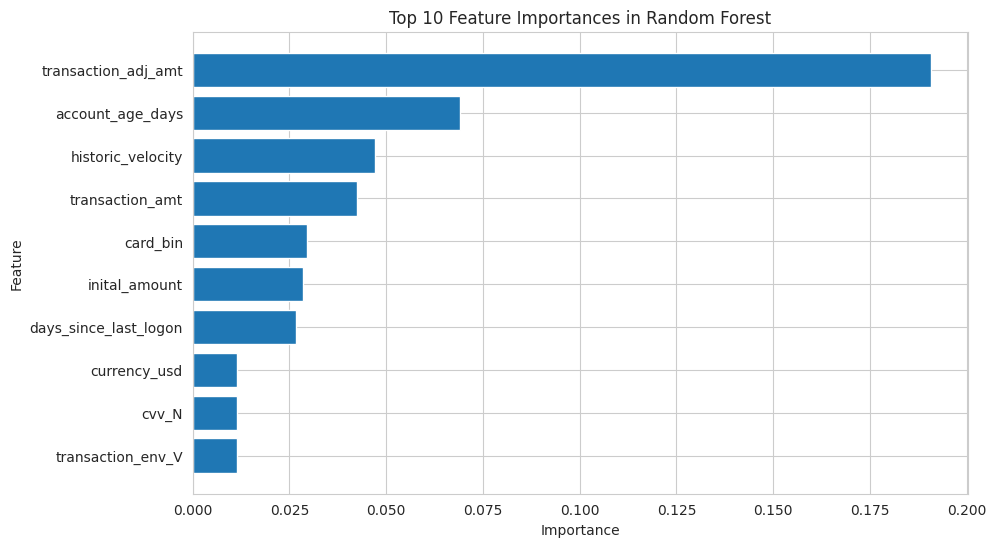

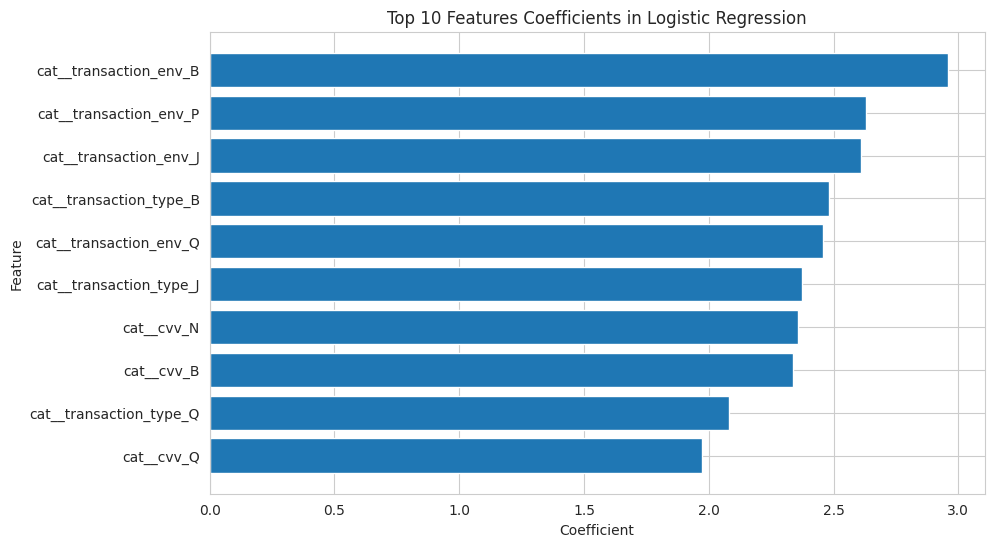

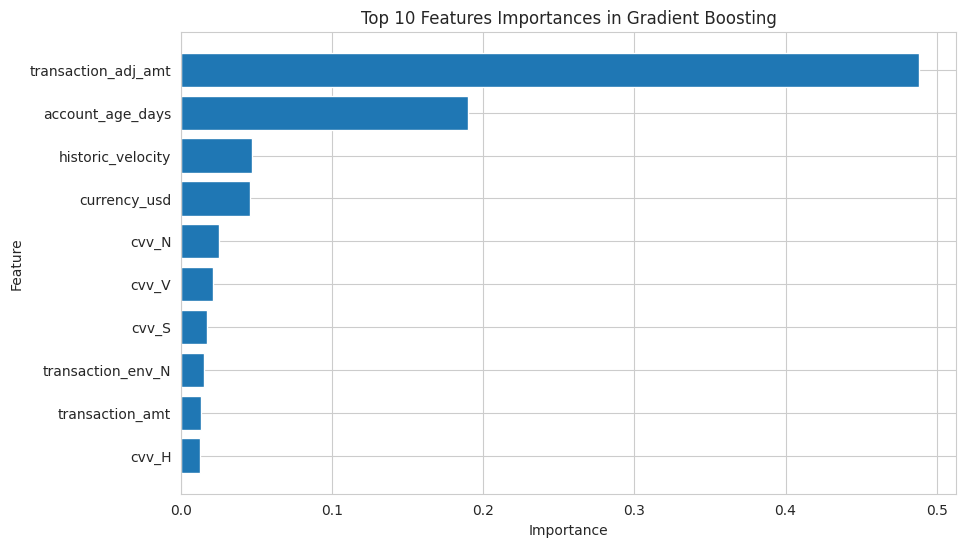

In [32]:
# Plot for Random Forest
plt.figure(figsize=(10, 6))
plt.title('Top 10 Feature Importances in Random Forest')
plt.barh(rf_feature_importance_df['Feature'][:10], rf_feature_importance_df['Importance'][:10])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.gca().invert_yaxis()
plt.show()

# Plot for Logistic Regression
plt.figure(figsize=(10, 6))
plt.title('Top 10 Features Coefficients in Logistic Regression')
plt.barh(lr_feature_importance_df['Feature'][:10], lr_feature_importance_df['Coefficient'][:10])
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.gca().invert_yaxis()
plt.show()

# Plot for Gradient Boosting
plt.figure(figsize=(10, 6))
plt.title('Top 10 Features Importances in Gradient Boosting')
plt.barh(gbm_feature_importance_df['Feature'][:10], gbm_feature_importance_df['Importance'][:10])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.gca().invert_yaxis()
plt.show()

Interesting to see that GBM and RF have similar important features.

# Parameter Tuning

These can take as little or as long as you want. Sit back, grab a beer, and watch some Hell's Kitchen as this code runs.

## Random Forest

In [ ]:
# Create the parameter grid
param_grid = {
    'classifier__n_estimators': [20, 30, 50],
    'classifier__max_depth': [None, 5, 10],
    'classifier__min_samples_split': [ 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4]
}

# Instantiate the GridSearchCV object
grid_search = GridSearchCV(rf_pipeline, param_grid, cv=3, n_jobs=-1, scoring='roc_auc', verbose=1)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Get the best set of hyperparameters
best_params = grid_search.best_params_

# Print the best set of hyperparameters
print("Best parameters:")
for key, value in best_params.items():
    print(f"  {key}: {value}")

Fitting 3 folds for each of 54 candidates, totalling 162 fits
Best parameters:
  classifier__max_depth: None
  classifier__min_samples_leaf: 1
  classifier__min_samples_split: 5
  classifier__n_estimators: 50


## Logistic Regression

In [ ]:
# Create the parameter grid
param_grid = {
    'classifier__penalty': ['l1', 'l2', 'elasticnet'],
    'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100],
    'classifier__solver': ['saga', 'liblinear'],
    'classifier__max_iter': [50, 100, 200]
}

# Instantiate the GridSearchCV object
grid_search = GridSearchCV(lr_pipeline, param_grid, cv=3, n_jobs=-1, scoring='roc_auc', verbose=1)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Get the best set of hyperparameters
best_params = grid_search.best_params_

# Print the best set of hyperparameters
print("Best parameters:")
for key, value in best_params.items():
    print(f"  {key}: {value}")

Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best parameters:
  classifier__C: 1
  classifier__max_iter: 50
  classifier__penalty: l1
  classifier__solver: saga


## Gradient Boosting

In [ ]:
# Create the parameter grid
param_grid = {
    'classifier__n_estimators': [10, 100, 200],
    'classifier__learning_rate': [0.05, 0.1, 0.2]
}

# Instantiate the GridSearchCV object
grid_search = GridSearchCV(gbm_pipeline, param_grid, cv=3, n_jobs=-1, scoring='roc_auc', verbose=1)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Get the best set of hyperparameters
best_params = grid_search.best_params_

# Print the best set of hyperparameters
print("Best parameters:")
for key, value in best_params.items():
    print(f"  {key}: {value}")

Fitting 3 folds for each of 9 candidates, totalling 27 fits
Best parameters:
  classifier__learning_rate: 0.2
  classifier__n_estimators: 200


# Tuned Pipelines

## Random Forest

In [33]:
# Initialize the pipeline with the preprocessor and a Random Forest classifier
rf_pipeline_hpo = Pipeline(steps=[('preprocessor', preprocessor),
                              ('classifier', RandomForestClassifier(n_estimators=50,
                                                                    min_samples_split=5,
                                                                    min_samples_leaf=1,
                                                                    max_depth = None,
                                                                    n_jobs=-1,
                                                                    random_state=42))])
# Train the pipeline
rf_pipeline_hpo.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['account_age_days',
                                                   'transaction_amt',
                                                   'transaction_adj_amt',
                                                   'historic_velocity',
                                                   'card_bin',
                                                   'days_since_last_logon',
                                                   'inital_amount']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['locale',
                                                   'tranaction_initiate',
                                                   'transaction_env',
                                                   'billing_state', 'currency',
                                                   'cvv', 'signature_image',
                                                   'transaction_type'])])),
                ('classifier',
                 RandomForestClassifier(min_samples_split=5, n_estimators=50,
                                        n_jobs=-1, random_state=42))])

In [34]:
# compare rf_pipeline to rf_pipeline_hpo performance
y_pred_rf = rf_pipeline.predict(X_test)
y_pred_proba_rf = rf_pipeline.predict_proba(X_test)[:, 1]
y_pred_rf_hpo = rf_pipeline_hpo.predict(X_test)
y_pred_proba_rf_hpo = rf_pipeline_hpo.predict_proba(X_test)[:, 1]

# Evaluation Metrics
print("Random Forest Model Evaluation:")
print(f"  Accuracy: {accuracy_rf:.4f}")
print(f"  AUC: {auc_rf:.4f}")
print(f"  Precision: {precision_rf:.4f}")
print(f"  Recall: {recall_rf:.4f}")
print("\n -------- \n")
print("Random Forest Model Evaluation with HPO:")
print(f"  Accuracy: {accuracy_score(y_test, y_pred_rf_hpo):.4f}")
print(f"  AUC: {roc_auc_score(y_test, y_pred_proba_rf_hpo):.4f}")
print(f"  Precision: {precision_score(y_test, y_pred_rf_hpo):.4f}")
print(f"  Recall: {recall_score(y_test, y_pred_rf_hpo):.4f}")

Random Forest Model Evaluation:
  Accuracy: 0.9718
  AUC: 0.9407
  Precision: 0.9562
  Recall: 0.5092

 -------- 

Random Forest Model Evaluation with HPO:
  Accuracy: 0.9724
  AUC: 0.9412
  Precision: 0.9476
  Recall: 0.5262


Only slight improvements from the baseline model.

In [35]:
# Predict probabilities for the positive class
y_scores = rf_pipeline_hpo.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
# Define target FPR values
target_fpr = np.arange(0.01, 0.11, 0.01)  # From 1% to 10%

# Interpolate to find TPR and threshold for target FPRs
interp_tpr = np.interp(target_fpr, fpr, tpr)
interp_thresholds = np.interp(target_fpr, fpr, thresholds)

# Print the results
for i in range(len(target_fpr)):
    print(f"Target FPR: {target_fpr[i]:.2f}, Expected TPR: {interp_tpr[i]:.4f}, Threshold: {interp_thresholds[i]:.4f}")

Target FPR: 0.01, Expected TPR: 0.7437, Threshold: 0.2763
Target FPR: 0.02, Expected TPR: 0.8010, Threshold: 0.1950
Target FPR: 0.03, Expected TPR: 0.8287, Threshold: 0.1514
Target FPR: 0.04, Expected TPR: 0.8413, Threshold: 0.1253
Target FPR: 0.05, Expected TPR: 0.8534, Threshold: 0.1070
Target FPR: 0.06, Expected TPR: 0.8646, Threshold: 0.0938
Target FPR: 0.07, Expected TPR: 0.8736, Threshold: 0.0840
Target FPR: 0.08, Expected TPR: 0.8796, Threshold: 0.0757
Target FPR: 0.09, Expected TPR: 0.8840, Threshold: 0.0694
Target FPR: 0.10, Expected TPR: 0.8870, Threshold: 0.0640


In [36]:
# Create a DataFrame from the target FPR, interpolated TPR, and interpolated thresholds
target_fpr_df = pd.DataFrame({
    'Target FPR (%)': target_fpr * 100,  # Convert to percentage
    'Expected TPR': interp_tpr,
    'Threshold': interp_thresholds
})

# Display the DataFrame
target_fpr_df

,Target FPR (%),Expected TPR,Threshold
0,1.0,0.743689,0.276320
1,2.0,0.800971,0.194962
2,3.0,0.828738,0.151410
3,4.0,0.841262,0.125319
4,5.0,0.853398,0.107000
5,6.0,0.864563,0.093752
6,7.0,0.873592,0.084029
7,8.0,0.879612,0.075700
8,9.0,0.883981,0.069418
9,10.0,0.887048,0.064032


In [37]:
# Adjusting the feature name extraction for OneHotEncoder to use get_feature_names_out
feature_names = list(preprocessor.transformers_[0][2]) + \
    list(preprocessor.named_transformers_['cat'].named_steps['onehot'].get_feature_names_out(categorical_cols))

rf_importances = rf_pipeline_hpo.named_steps['classifier'].feature_importances_

# Display the top 10 features
rf_feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': rf_importances})
rf_feature_importance_df = rf_feature_importance_df.sort_values(by='Importance', ascending=False)
rf_feature_importance_df.head(10)

,Feature,Importance
2,transaction_adj_amt,0.233739
0,account_age_days,0.066134
3,historic_velocity,0.043584
1,transaction_amt,0.037670
4,card_bin,0.022963
6,inital_amount,0.022644
5,days_since_last_logon,0.019733
426,cvv_V,0.013785
418,cvv_N,0.013718
339,transaction_env_N,0.012985


## Logistic Regression

In [38]:
# Define the Logistic Regression pipeline
lr_pipeline_hpo = Pipeline(steps=[('preprocessor', preprocessor),
                              ('classifier', LogisticRegression(random_state=0,
                                                                max_iter=50,
                                                                C=1,
                                                                penalty='l1',
                                                                solver='saga'))])

# Train the pipeline
lr_pipeline_hpo.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['account_age_days',
                                                   'transaction_amt',
                                                   'transaction_adj_amt',
                                                   'historic_velocity',
                                                   'card_bin',
                                                   'days_since_last_logon',
                                                   'inital_amount']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['locale',
                                                   'tranaction_initiate',
                                                   'transaction_env',
                                                   'billing_state', 'currency',
                                                   'cvv', 'signature_image',
                                                   'transaction_type'])])),
                ('classifier',
                 LogisticRegression(C=1, max_iter=50, penalty='l1',
                                    random_state=0, solver='saga'))])

In [39]:
# compare lr_pipeline to lr_pipeline_hpo performance
y_pred_lr = lr_pipeline.predict(X_test)
y_pred_proba_lr = lr_pipeline.predict_proba(X_test)[:, 1]
y_pred_lr_hpo = lr_pipeline_hpo.predict(X_test)
y_pred_proba_lr_hpo = lr_pipeline_hpo.predict_proba(X_test)[:, 1]

# Evaluation Metrics
print("Logistic Regression Model Evaluation:")
print(f"  Accuracy: {accuracy_lr:.4f}")
print(f"  AUC: {auc_lr:.4f}")
print(f"  Precision: {precision_lr:.4f}")
print(f"  Recall: {recall_lr:.4f}")
print("\n -------- \n")
print("Logistic Regression Model Evaluation with HPO:")
print(f"  Accuracy: {accuracy_score(y_test, y_pred_lr_hpo):.4f}")
print(f"  AUC: {roc_auc_score(y_test, y_pred_proba_lr_hpo):.4f}")
print(f"  Precision: {precision_score(y_test, y_pred_lr_hpo):.4f}")
print(f"  Recall: {recall_score(y_test, y_pred_lr_hpo):.4f}")

Logistic Regression Model Evaluation:
  Accuracy: 0.9747
  AUC: 0.9425
  Precision: 0.8809
  Recall: 0.6248

 -------- 

Logistic Regression Model Evaluation with HPO:
  Accuracy: 0.9748
  AUC: 0.9426
  Precision: 0.8805
  Recall: 0.6257


Interesting to see that my precsion actually went slightly DOWN.

In [40]:
# prompt: extract feature names and position from pipeline to do logisic feature importance

feature_names = preprocessor.get_feature_names_out()
feature_importance = lr_pipeline_hpo.named_steps['classifier'].coef_
feature_importance_df = pd.DataFrame({'feature': feature_names, 'importance': feature_importance[0]})
feature_importance_df.sort_values(by='importance', ascending=False).reset_index(drop=True)

,feature,importance
0,cat__transaction_env_P,3.577400
1,cat__transaction_env_B,3.437834
2,cat__transaction_env_J,3.202218
3,cat__cvv_B,2.996011
4,cat__transaction_env_Q,2.548545
...,...,...
476,cat__transaction_type_T,-2.574310
477,cat__transaction_type_E,-2.787880
478,cat__currency_usd,-3.055803
479,cat__transaction_type_R,-3.122938


In [41]:
# Logistic Regression coefficients as feature importance
lr_coefficients = lr_pipeline_hpo.named_steps['classifier'].coef_[0]

# Aligning feature names and coefficients
lr_feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': lr_coefficients})
lr_feature_importance_df = lr_feature_importance_df.sort_values(by='Coefficient', ascending=False)
lr_feature_importance_df.head(10)

,Feature,Coefficient
341,cat__transaction_env_P,3.577400
327,cat__transaction_env_B,3.437834
335,cat__transaction_env_J,3.202218
406,cat__cvv_B,2.996011
342,cat__transaction_env_Q,2.548545
418,cat__cvv_N,2.369784
464,cat__transaction_type_J,2.360202
456,cat__transaction_type_B,2.222042
421,cat__cvv_Q,2.059724
439,cat__signature_image_J,1.938472


## Gradient Boosting

In [42]:
gbm_pipeline_hpo = Pipeline(steps=[('preprocessor', preprocessor),
                                ('classifier', GradientBoostingClassifier(learning_rate=0.2,
                                                                          n_estimators=200))])

# Train the pipeline
gbm_pipeline_hpo.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['account_age_days',
                                                   'transaction_amt',
                                                   'transaction_adj_amt',
                                                   'historic_velocity',
                                                   'card_bin',
                                                   'days_since_last_logon',
                                                   'inital_amount']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['locale',
                                                   'tranaction_initiate',
                                                   'transaction_env',
                                                   'billing_state', 'currency',
                                                   'cvv', 'signature_image',
                                                   'transaction_type'])])),
                ('classifier',
                 GradientBoostingClassifier(learning_rate=0.2,
                                            n_estimators=200))])

In [43]:
# compare gbm_pipeline to gbm_pipeline_hpo performance
y_pred_gbm = gbm_pipeline.predict(X_test)
y_pred_proba_gbm = gbm_pipeline.predict_proba(X_test)[:, 1]
y_pred_gbm_hpo = gbm_pipeline_hpo.predict(X_test)
y_pred_proba_gbm_hpo = gbm_pipeline_hpo.predict_proba(X_test)[:, 1]

# Evaluation Metrics
print("Gradient Boosting Model Evaluation:")
print(f"  Accuracy: {accuracy_gbm:.4f}")
print(f"  AUC: {auc_gbm:.4f}")
print(f"  Precision: {precision_gbm:.4f}")
print(f"  Recall: {recall_gbm:.4f}")
print("\n -------- \n")
print("Gradient Boosting Model Evaluation with HPO:")
print(f"  Accuracy: {accuracy_score(y_test, y_pred_gbm_hpo):.4f}")
print(f"  AUC: {roc_auc_score(y_test, y_pred_proba_gbm_hpo):.4f}")
print(f"  Precision: {precision_score(y_test, y_pred_gbm_hpo):.4f}")
print(f"  Recall: {recall_score(y_test, y_pred_gbm_hpo):.4f}")

Gradient Boosting Model Evaluation:
  Accuracy: 0.9723
  AUC: 0.9407
  Precision: 0.8877
  Recall: 0.5680

 -------- 

Gradient Boosting Model Evaluation with HPO:
  Accuracy: 0.9786
  AUC: 0.9462
  Precision: 0.9100
  Recall: 0.6772


Out of all three models, GBM had the most improvement with none of the eval metrics decreasing.

In [44]:
# Predict probabilities for the positive class
y_scores = gbm_pipeline_hpo.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
# Define target FPR values
target_fpr = np.arange(0.01, 0.11, 0.01)  # From 1% to 10%

# Interpolate to find TPR and threshold for target FPRs
interp_tpr = np.interp(target_fpr, fpr, tpr)
interp_thresholds = np.interp(target_fpr, fpr, thresholds)

# Print the results
for i in range(len(target_fpr)):
    print(f"Target FPR: {target_fpr[i]:.2f}, Expected TPR: {interp_tpr[i]:.4f}, Threshold: {interp_thresholds[i]:.4f}")

Target FPR: 0.01, Expected TPR: 0.7636, Threshold: 0.2816
Target FPR: 0.02, Expected TPR: 0.8078, Threshold: 0.1579
Target FPR: 0.03, Expected TPR: 0.8374, Threshold: 0.1044
Target FPR: 0.04, Expected TPR: 0.8529, Threshold: 0.0805
Target FPR: 0.05, Expected TPR: 0.8670, Threshold: 0.0639
Target FPR: 0.06, Expected TPR: 0.8748, Threshold: 0.0524
Target FPR: 0.07, Expected TPR: 0.8825, Threshold: 0.0449
Target FPR: 0.08, Expected TPR: 0.8893, Threshold: 0.0386
Target FPR: 0.09, Expected TPR: 0.8937, Threshold: 0.0342
Target FPR: 0.10, Expected TPR: 0.8985, Threshold: 0.0306


In [45]:
# Create a DataFrame from the target FPR, interpolated TPR, and interpolated thresholds
target_fpr_df = pd.DataFrame({
    'Target FPR (%)': target_fpr * 100,  # Convert to percentage
    'Expected TPR': interp_tpr,
    'Threshold': interp_thresholds
})

# Display the DataFrame
target_fpr_df

,Target FPR (%),Expected TPR,Threshold
0,1.0,0.763592,0.281582
1,2.0,0.807767,0.157946
2,3.0,0.837379,0.104438
3,4.0,0.852913,0.080540
4,5.0,0.866990,0.063915
5,6.0,0.874757,0.052416
6,7.0,0.882524,0.044886
7,8.0,0.889320,0.038638
8,9.0,0.893689,0.034176
9,10.0,0.898544,0.030644


In [46]:
# Adjusting the feature name extraction for OneHotEncoder to use get_feature_names_out
feature_names = list(preprocessor.transformers_[0][2]) + \
    list(preprocessor.named_transformers_['cat'].named_steps['onehot'].get_feature_names_out(categorical_cols))

gbm_importances = gbm_pipeline_hpo.named_steps['classifier'].feature_importances_

# Display the top 10 features
gbm_feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': gbm_importances})
gbm_feature_importance_df = gbm_feature_importance_df.sort_values(by='Importance', ascending=False)
gbm_feature_importance_df.head(10)

,Feature,Importance
2,transaction_adj_amt,0.428103
0,account_age_days,0.183551
3,historic_velocity,0.075690
404,currency_usd,0.045402
1,transaction_amt,0.019823
418,cvv_N,0.019792
426,cvv_V,0.018526
423,cvv_S,0.018449
473,transaction_type_S,0.015919
339,transaction_env_N,0.015085


## Tuned Feature Selection

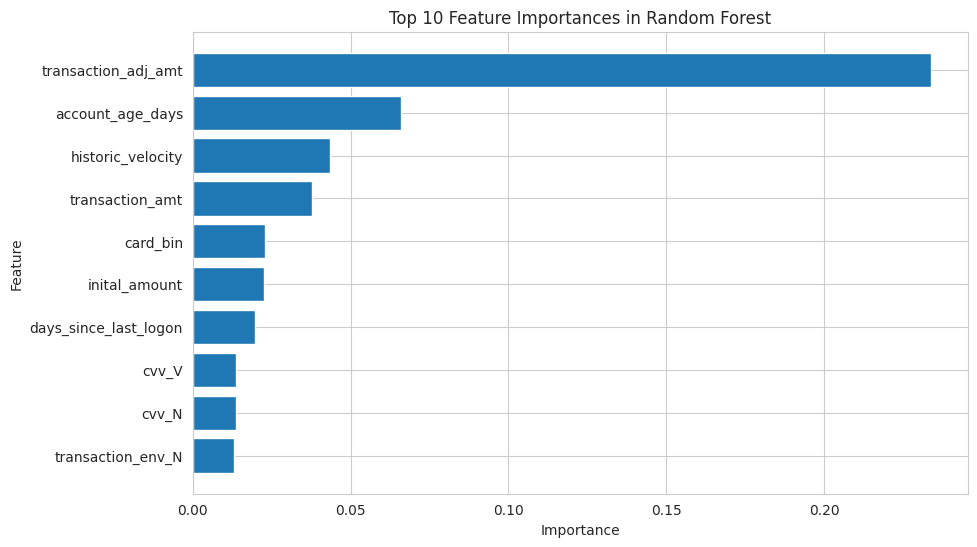

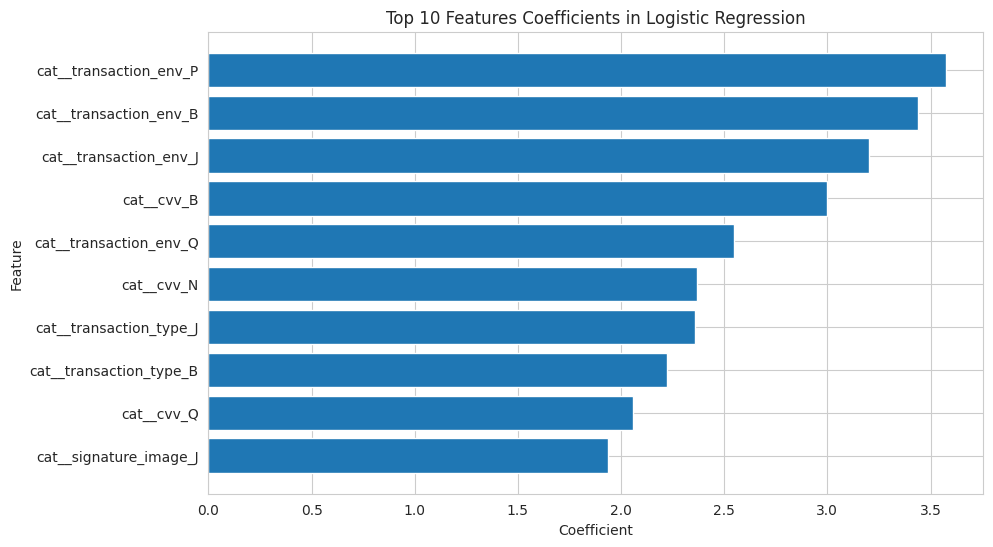

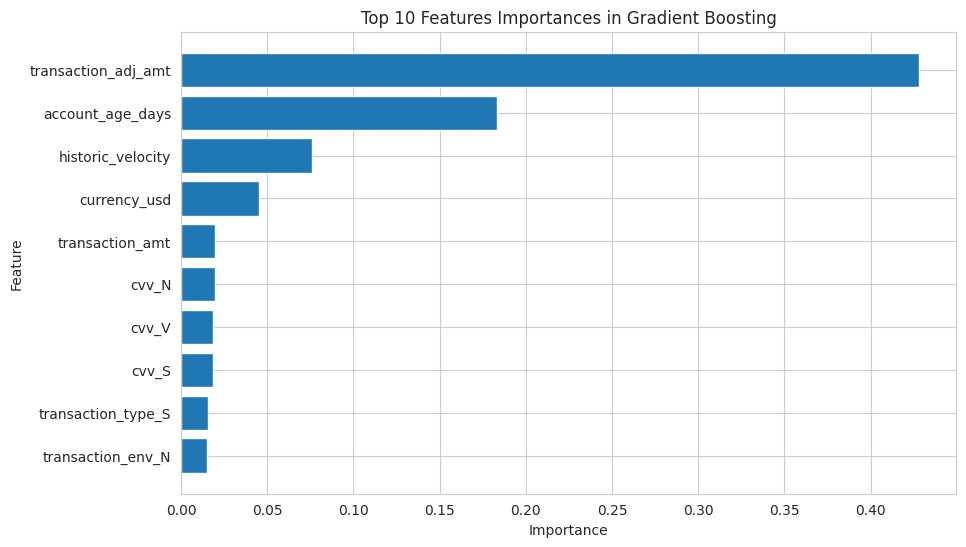

In [47]:
# Plot for Random Forest
plt.figure(figsize=(10, 6))
plt.title('Top 10 Feature Importances in Random Forest')
plt.barh(rf_feature_importance_df['Feature'][:10], rf_feature_importance_df['Importance'][:10])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.gca().invert_yaxis()
plt.show()

# Plot for Logistic Regression
plt.figure(figsize=(10, 6))
plt.title('Top 10 Features Coefficients in Logistic Regression')
plt.barh(lr_feature_importance_df['Feature'][:10], lr_feature_importance_df['Coefficient'][:10])
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.gca().invert_yaxis()
plt.show()

# Plot for Gradient Boosting
plt.figure(figsize=(10, 6))
plt.title('Top 10 Features Importances in Gradient Boosting')
plt.barh(gbm_feature_importance_df['Feature'][:10], gbm_feature_importance_df['Importance'][:10])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.gca().invert_yaxis()
plt.show()

According to my best model (GBM), the adjustment USD $ value to the transaction had the most importance by a mile.

# AUC-ROC

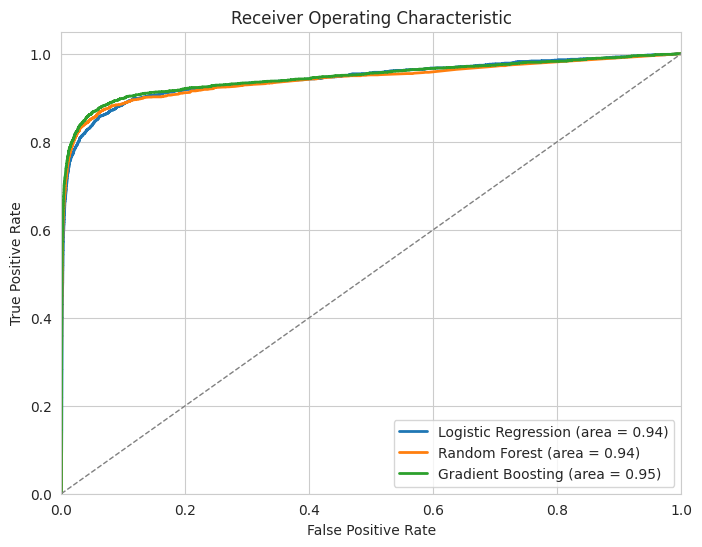

In [48]:
pipelines = [lr_pipeline_hpo, rf_pipeline_hpo, gbm_pipeline_hpo]
pipeline_names = ['Logistic Regression', 'Random Forest', 'Gradient Boosting']

auc_roc_values = []

# Plot ROC curves for each pipeline
plt.figure(figsize=(8, 6))
for pipeline, name in zip(pipelines, pipeline_names):
    # Make predictions on test data to get probabilities
    probs = pipeline.predict_proba(X_test)
    preds = probs[:, 1]  # Probabilities of the positive class

    # Compute ROC curve and AUC
    fpr, tpr, thresholds = roc_curve(y_test, preds)
    roc_auc = auc(fpr, tpr)
    auc_roc_values.append(roc_auc)

    # Plot ROC curve
    plt.plot(fpr, tpr, lw=2, label='%s (area = %0.2f)' % (name, roc_auc))

# Plot random guessing line
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')

# Set plot attributes
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


Not too much differentiation with the AUC-ROCs.

# Precision-Recall Curve

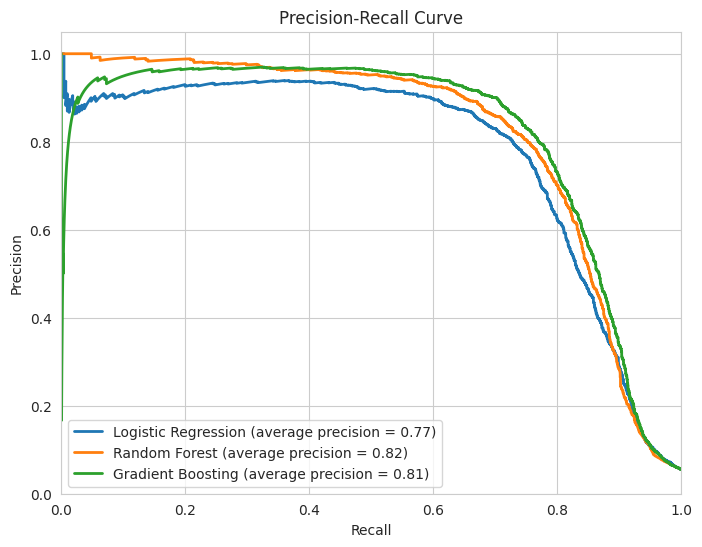

In [49]:
auc_pr_values = []

# Plot Precision-Recall curves for each pipeline
plt.figure(figsize=(8, 6))
for pipeline, name in zip(pipelines, pipeline_names):
    # Make predictions on test data to get probabilities
    probs = pipeline.predict_proba(X_test)
    preds = probs[:, 1]  # Probabilities of the positive class

    # Compute Precision-Recall curve and AUC
    precision, recall, _ = precision_recall_curve(y_test, preds)
    pr_auc = average_precision_score(y_test, preds)
    auc_pr_values.append(pr_auc)

    # Plot Precision-Recall curve
    plt.plot(recall, precision, lw=2, label='%s (average precision = %0.2f)' % (name, pr_auc))

# Set plot attributes
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.show()

RF only slightly better than GBM, but they're all pretty good.

# F1-Scores

In [50]:
f1_scores = []

# Compute F1 scores for each pipeline
for pipeline, name in zip(pipelines, pipeline_names):
    # Make predictions on test data
    y_pred = pipeline.predict(X_test)

    # Compute F1 score
    f1 = f1_score(y_test, y_pred)
    f1_scores.append(f1)

    # Print F1 score
    print(f"F1 score for {name}: {f1:.4f}")


F1 score for Logistic Regression: 0.7316
F1 score for Random Forest: 0.6767
F1 score for Gradient Boosting: 0.7765


YUH GBM taking the medal with the highest F1 score.

# Confusion Matrices

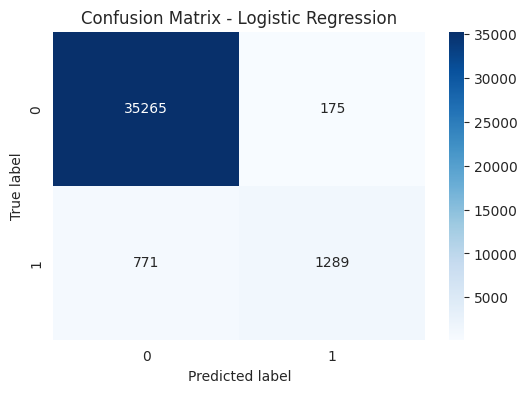

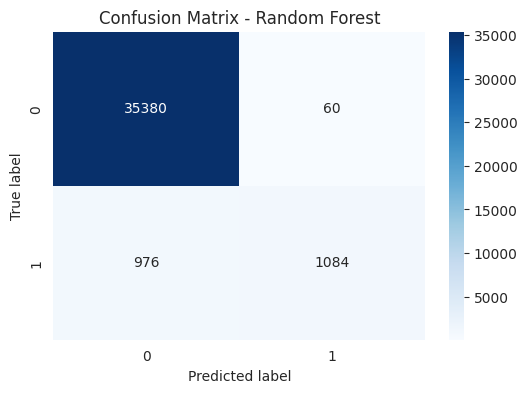

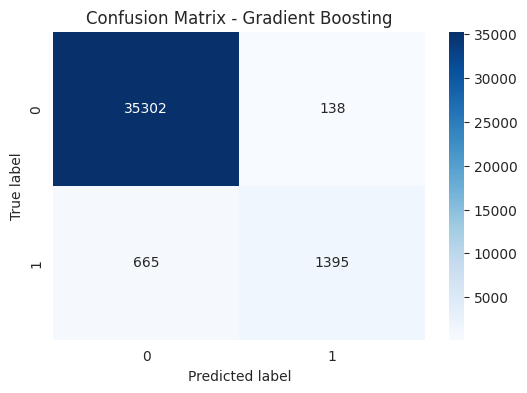

In [51]:
confusion_matrices = []

# Compute confusion matrix for each pipeline
for pipeline, name in zip(pipelines, pipeline_names):
    # Make predictions on test data
    y_pred = pipeline.predict(X_test)

    # Compute confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    confusion_matrices.append(cm)

    # Plot confusion matrix with seaborn
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.xlabel("Predicted label")
    plt.ylabel("True label")
    plt.title(f"Confusion Matrix - {name}")
    plt.show()

In [52]:
TPRs = []
FPRs = []
Precisions = []

# Compute metrics for each pipeline
for pipeline, name, cm in zip(pipelines, pipeline_names, confusion_matrices):
    # Extracting TN, FP, FN, TP
    TN, FP, FN, TP = cm.ravel()

    # Calculating TPR, FPR, and Precision
    TPR = TP / (TP + FN)
    FPR = FP / (FP + TN)
    Precision = TP / (TP + FP)

    # Append TPR, FPR, and Precision to lists
    TPRs.append(TPR)
    FPRs.append(FPR)
    Precisions.append(Precision)

    # Printing the metrics
    print(f"Metrics for {name}:")
    print(f"True Positive Rate (TPR): {TPR:.3%}")
    print(f"False Positive Rate (FPR): {FPR:.3%}")
    print(f"Precision: {Precision:.3%}")
    print()

Metrics for Logistic Regression:
True Positive Rate (TPR): 62.573%
False Positive Rate (FPR): 0.494%
Precision: 88.046%

Metrics for Random Forest:
True Positive Rate (TPR): 52.621%
False Positive Rate (FPR): 0.169%
Precision: 94.755%

Metrics for Gradient Boosting:
True Positive Rate (TPR): 67.718%
False Positive Rate (FPR): 0.389%
Precision: 90.998%



GBM has the highest true positive rate by a good difference. The false positive rates are not as different as the TPRs, so I still say GBM won in this area as well.

# Predictions on Holdout Set

## Load in new dataset

In [75]:
with zipfile.ZipFile('/content/project_2_holdout.csv.zip', 'r') as zip_ref:
    zip_ref.extractall('')

# Load the dataset
df_new = pd.read_csv('project_2_holdout.csv')

# Display the first few rows of the dataframe
df_new.head()

,EVENT_ID,account_age_days,transaction_amt,transaction_adj_amt,historic_velocity,ip_address,user_agent,email_domain,phone_number,billing_city,...,transaction_type,transaction_env,EVENT_TIMESTAMP,applicant_name,billing_address,merchant_id,locale,tranaction_initiate,days_since_last_logon,inital_amount
0,109420,4462,3648,54,6325,197.108.209.59,Opera/8.29.(X11; Linux i686; mk-MK) Presto/2.9...,perez-smith.org,+1-776-557-7526x274,Danielville,...,D,G,3/28/21 22:17,Mrs. Dawn Murray,414 Gregory Mountains Suite 443,618-52-2474,gd_GB,O,23.0,2422.0
1,1049060,3360,2180,54,4030,178.166.190.20,Opera/8.16.(X11; Linux i686; is-IS) Presto/2.9...,morris-diaz.com,001-427-310-1481x093,Thompsonshire,...,D,F,5/29/21 6:26,William Hughes,67405 Higgins Ways,651-14-8114,iu_CA,U,58.0,2160.0
2,2805320,4725,2063,60,4372,163.48.86.34,Mozilla/5.0 (X11; Linux x86_64; rv:1.9.5.20) G...,campos-brown.net,073.152.2261,North Lisaburgh,...,U,Z,3/17/21 7:35,Jennifer Johnson,41514 Toni Junction Suite 866,824-13-0148,yue_HK,O,34.0,14474.0
3,450840,5336,2319,72,4385,55.233.5.10,Mozilla/5.0 (Macintosh; U; Intel Mac OS X 10 1...,hanna-taylor.com,835-295-8283x42594,Joelville,...,X,W,4/26/21 5:34,Brenda Hopkins,1991 Angela Falls,633-56-8621,sa_IN,Y,84.0,13297.0
4,423160,6115,3413,61,5942,119.228.12.223,Opera/8.21.(X11; Linux i686; cv-RU) Presto/2.9...,gregory.com,424.203.8183,Hallburgh,...,D,W,1/17/21 13:25,Patricia Davis,57145 Walton Valleys Suite 250,636-15-1188,doi_IN,I,89.0,5425.0


In [76]:
df_new.columns

Index(['EVENT_ID', 'account_age_days', 'transaction_amt',
       'transaction_adj_amt', 'historic_velocity', 'ip_address', 'user_agent',
       'email_domain', 'phone_number', 'billing_city', 'billing_postal',
       'billing_state', 'card_bin', 'currency', 'cvv', 'signature_image',
       'transaction_type', 'transaction_env', 'EVENT_TIMESTAMP',
       'applicant_name', 'billing_address', 'merchant_id', 'locale',
       'tranaction_initiate', 'days_since_last_logon', 'inital_amount'],
      dtype='object')

## Preprocessing Data

To score new people, I have to do the same preprocessing steps to the new dataset.

In [76]:
# Identify categorical and numerical columns
categorical_cols_2 = ['locale','tranaction_initiate','transaction_env','billing_state','currency','cvv','signature_image','transaction_type']
numerical_cols_2 = ['EVENT_ID', 'account_age_days', 'transaction_amt', 'transaction_adj_amt','historic_velocity', 'card_bin', 'days_since_last_logon', 'inital_amount']
feature_names = categorical_cols_2 + numerical_cols_2
# Preprocessing for numerical data
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())])

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols_2),
        ('cat', categorical_transformer, categorical_cols_2)])

# Define the target variable
y = df['EVENT_LABEL'].map({'legit': 0, 'fraud': 1})  # Convert to binary
X = df.drop('EVENT_LABEL', axis=1)

# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X[feature_names], y, test_size=0.3, random_state=0)

Here you can see that I chose the tuned GBM because it was my best model.

In [77]:
# make predictions on the training and test data
Scored_class = gbm_pipeline_hpo.predict(df_new)
Scored_probs = gbm_pipeline_hpo.predict_proba(df_new)

df_new['pred_fraud'] = Scored_class
df_new['pred_prob_fraud']=Scored_probs[:,1]

print(df_new)

       EVENT_ID  account_age_days  transaction_amt  transaction_adj_amt  \
0        109420              4462             3648                   54   
1       1049060              3360             2180                   54   
2       2805320              4725             2063                   60   
3        450840              5336             2319                   72   
4        423160              6115             3413                   61   
...         ...               ...              ...                  ...   
24995   1946880              3944             1843                   59   
24996   1744520              3511             2907                   41   
24997    432200              4595             2689                   44   
24998   1082260              3376             2812                   55   
24999    797160              6032             3854                   76   

       historic_velocity       ip_address  \
0                   6325   197.108.209.59   
1        

I only want the EVENT_ID, EVENT_LABEL, and pred_prob_fraud column, so I'll drop the rest.

In [79]:
columns_to_drop = ['account_age_days', 'transaction_amt', 'transaction_adj_amt',
                   'historic_velocity', 'ip_address', 'user_agent', 'email_domain',
                   'phone_number', 'billing_city', 'billing_postal', 'billing_state',
                   'card_bin', 'currency', 'cvv', 'signature_image', 'transaction_type',
                   'transaction_env', 'EVENT_TIMESTAMP', 'applicant_name', 'billing_address',
                   'merchant_id', 'locale', 'tranaction_initiate', 'days_since_last_logon',
                   'inital_amount']

df_new.drop(columns=columns_to_drop, inplace=True)

print(df_new)

       EVENT_ID  pred_fraud  pred_prob_fraud
0        109420           0         0.007564
1       1049060           0         0.001626
2       2805320           0         0.005095
3        450840           0         0.002332
4        423160           0         0.006459
...         ...         ...              ...
24995   1946880           0         0.006177
24996   1744520           0         0.061701
24997    432200           0         0.082551
24998   1082260           0         0.003281
24999    797160           0         0.076151

[25000 rows x 3 columns]


Here we see the predictions! My model predicts that 23,936 are legit and 1064 are fraud.

In [81]:
df_new['pred_fraud'].value_counts()

0    23936
1     1064
Name: pred_fraud, dtype: int64

I could've prevented this by doing it earlier but oh well. I'm just renaming the column.

In [82]:
df_new.rename(columns={'pred_fraud': 'EVENT_LABEL'}, inplace=True)
df_new

,EVENT_ID,EVENT_LABEL,pred_prob_fraud
0,109420,0,0.007564
1,1049060,0,0.001626
2,2805320,0,0.005095
3,450840,0,0.002332
4,423160,0,0.006459
...,...,...,...
24995,1946880,0,0.006177
24996,1744520,0,0.061701
24997,432200,0,0.082551
24998,1082260,0,0.003281


Now I saved the result to a csv!

In [83]:
df_new.to_csv('fraud_holdout_predictions.csv', index=False)

#That's all folks ❤️